In [337]:
#pip install pandas

In [338]:
#pip install scikit-learn matplotlib

In [339]:
#pip install seaborn

In [458]:
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for removing punctuations 
import string

import warnings
warnings.filterwarnings('ignore')

In [341]:
df = pd.read_csv('data_cleaned.csv')

In [342]:
df.head()

company_name   location  \
0         Procter & Gamble     Mumbai   
1               S&P Global    Gurgaon   
2  Oracuz Infotech Pvt Ltd     Remote   
3                    Optum  Bengaluru   
4                 ITI Data    Chennai   

                                           job_title  \
0  Senior Manager – SAP Security Governance: Risk...   
1                          Apprentice – Data Analyst   
2                                Data Science Intern   
3                             Manager Data Scientist   
4                             AWS Glue Data Engineer   

                                     job_description  rating  \
0  The Senior Manager’s role will ensure that the...     4.1   
1  We are responsible for assuring that data impa...     4.1   
2  You will be assigned with module projects and ...     NaN   
3  As an Associate Manager, you will play a criti...     NaN   
4  Require Financial Services industry experience...     4.2   

   employer_estimate  min_salary  max_salary  avg_salary  \
0                  0      400000      700000    550000.0   
1                  0      500000      700000    600000.0   
2                  1        5000        5000      5000.0   
3                  0     1000000     1000000   1000000.0   
4                  0      200000      900000    550000.0   

                   Size Founded               Type  \
0      10000+ Employees    1837   Company - Public   
1      10000+ Employees    1860   Company - Public   
2                   NaN     NaN                NaN   
3                   NaN     NaN                NaN   
4  201 to 500 Employees    1999  Company - Private   

                                  Industry                     Sector  \
0           Consumer Product Manufacturing              Manufacturing   
1                 Research and development  Management and consulting   
2                                      NaN                        NaN   
3                                      NaN                        NaN   
4  Information Technology Support Services     Information Technology   

                    Revenue  \
0        $10+ billion (USD)   
1        $10+ billion (USD)   
2                       NaN   
3                       NaN   
4  Unknown / Non-Applicable   

                                              skills    age  
0        SAP, SOX, Analysis skills, SAP S/4HANA, RMF  187.0  
1   Business intelligence, Relational databases, ...  164.0  
2    Web development, Machine learning, Data science    NaN  
3   TensorFlow, Big data, SQL, Analysis skills, M...    NaN  
4                 Oracle, XML, Spark, NoSQL, MongoDB   25.0

In [343]:
df.duplicated().sum()

np.int64(0)

In [344]:
df.columns

Index(['company_name', 'location', 'job_title', 'job_description', 'rating',
       'employer_estimate', 'min_salary', 'max_salary', 'avg_salary', 'Size',
       'Founded', 'Type', 'Industry', 'Sector', 'Revenue', 'skills', 'age'],
      dtype='object')

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company_name       374 non-null    object 
 1   location           374 non-null    object 
 2   job_title          374 non-null    object 
 3   job_description    374 non-null    object 
 4   rating             321 non-null    float64
 5   employer_estimate  374 non-null    int64  
 6   min_salary         374 non-null    int64  
 7   max_salary         374 non-null    int64  
 8   avg_salary         374 non-null    float64
 9   Size               323 non-null    object 
 10  Founded            323 non-null    object 
 11  Type               323 non-null    object 
 12  Industry           323 non-null    object 
 13  Sector             323 non-null    object 
 14  Revenue            323 non-null    object 
 15  skills             373 non-null    object 
 16  age                268 non

### Things we did


- Explore various job_titles and how they affect the salary column
- how location affects salary 
- how the age of the company does that
- what are the skills needed for different profiles - on a bird eye view what skills correspond to which profile
- what skills are required for higher salaried positions
- does the size of the company affect the salary
- maximum jobs are available in which location 
- do higher rated companies pay well 
- does employer estimate affect salary any how - like if the employer estimate is better salary than glassdoor estimate
- which industry and sector offer the most jobs - try combining these two cols if they are similar - no they are having different categories !
- what is the max salary offered in our dataset 
- look into the distributions and barplots of numeric and categorical columns respectively 
- word cloud of different skills 
- word cloud of different job descriptions

### `1) Explore various job_titles and how they affect the salary column`

In [346]:
df['job_title'].value_counts()

job_title
Data Science Intern                                                               14
Data Analyst                                                                      14
Data Scientist                                                                    12
Data Engineer                                                                      6
Data Analyst, Predictive, India- X Delivery                                        6
                                                                                  ..
Data Engineer II                                                                   1
Associate Data Scientists                                                          1
Junior AI Developer                                                                1
Engineering.HO>Engineering.Data Science>Data Scientist>Airtel Centre - Gurgaon     1
2025 Bangalore Software Engineering Internship                                     1
Name: count, Length: 186, dtype: int64

In [347]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [348]:
# create vocabulary of all unique words in the job title to see which ones are the main common ones to affect salary
#df['job_title'].replace(',','',inplace = True)

In [349]:
def remove_punctuations(st):
    import string
    puns = string.punctuation
    for i in puns :
        if i in st :
            #print(i, st) # debugging
            st = st.replace(i,'')
    return st
df['job_title'] = df['job_title'].apply(remove_punctuations)

In [350]:
df.job_title

0      Senior Manager – SAP Security Governance Risk ...
1                              Apprentice – Data Analyst
2                                    Data Science Intern
3                                 Manager Data Scientist
4                                 AWS Glue Data Engineer
                             ...                        
369       2025 Bangalore Software Engineering Internship
370                                       Data Scientist
371                                  Data Science Intern
372                                  Data Science Intern
373                                         Data Analyst
Name: job_title, Length: 374, dtype: object

In [351]:
counts_series = df.job_title.str.lower().value_counts().sort_index()
print(len(counts_series))
# for i in range(len(counts_series)):
#     print(counts_series.index[i])

183


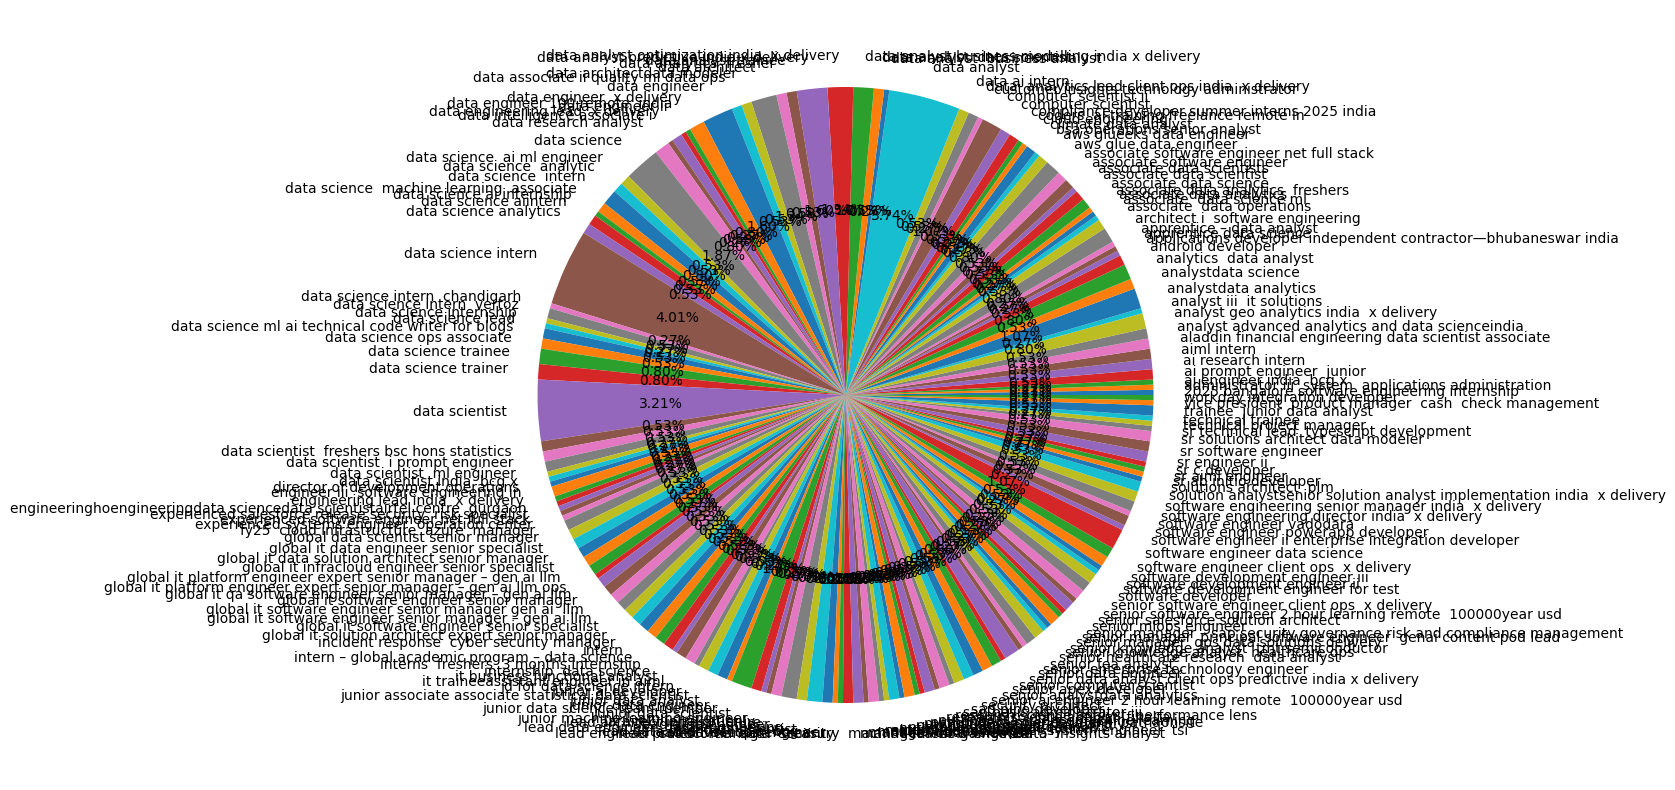

In [352]:
# a piechart for various job roles
plt.figure(figsize = (20,10))
plt.pie(counts_series, autopct = "%1.2f%%",labels = counts_series.index)
plt.show()

`above is a very messy list of so many (183 to be specific) different job titles out of which we need to select the important keywords to actually understand the trend of most frequent or important job titles`

### 1.1 seniority would become our ordinal variable

In [353]:
# separate Senior-junior tags
df['seniority'] = np.nan
# df['junior'] = np.nan # creating 2 cols representing the same thing i.e. seniorityity just adds on dimensionality

def seniority_tags(text,idx):
    text = text.lower()
    if 'sr' in text or 'senior'in text or 'lead' in text or 'manager'in text or 'director' in text or 'president'in text :
        df['seniority'][idx] = 2
    elif 'jr' in text or 'junior' in text or 'fresher' in text or 'freshers' in text or 'apprentice' in text or 'trainee' in text or 'intern' in text or 'assistant' in text:
        df['seniority'][idx] = 0
    else :
        df['seniority'][idx] = 1
    
for idx, i in enumerate(df['job_title']):
    seniority_tags(i, idx)                

In [354]:
df.seniority.value_counts()

seniority
1.0    195
2.0     99
0.0     80
Name: count, dtype: int64

In [355]:
df.isnull().sum() # age has 106 while founded has 51 null values since there were values like '-' in founded col

company_name           0
location               0
job_title              0
job_description        0
rating                53
employer_estimate      0
min_salary             0
max_salary             0
avg_salary             0
Size                  51
Founded               51
Type                  51
Industry              51
Sector                51
Revenue               51
skills                 1
age                  106
seniority              0
dtype: int64

In [356]:
# let's pick the keywords from each job title 

df.job_title = df.job_title.str.lower()

In [357]:
# helper code to understand key words to create simplified job titles

lst = []
for i in range(len(df)):
    lst.append(np.array(df.job_title[i].split()))

vocabulary = [word for sublist in lst for word in sublist]

freq_map = {}
for i in range(len(vocabulary)):
    if(vocabulary[i] not in freq_map):
        freq_map[vocabulary[i]] = 1
    else :
        freq_map[vocabulary[i]] += 1
        
sorted(freq_map.items(), key = lambda x : x[1], reverse = True) # sort in descending order of frequency

[(np.str_('data'), 227),
 (np.str_('engineer'), 96),
 (np.str_('science'), 74),
 (np.str_('analyst'), 73),
 (np.str_('senior'), 55),
 (np.str_('scientist'), 46),
 (np.str_('software'), 46),
 (np.str_('x'), 45),
 (np.str_('delivery'), 42),
 (np.str_('india'), 40),
 (np.str_('intern'), 34),
 (np.str_('manager'), 31),
 (np.str_('associate'), 27),
 (np.str_('ai'), 25),
 (np.str_('global'), 25),
 (np.str_('it'), 25),
 (np.str_('lead'), 24),
 (np.str_('analytics'), 22),
 (np.str_('developer'), 21),
 (np.str_('architect'), 19),
 (np.str_('engineering'), 19),
 (np.str_('junior'), 18),
 (np.str_('ops'), 16),
 (np.str_('–'), 13),
 (np.str_('learning'), 12),
 (np.str_('ii'), 11),
 (np.str_('trainee'), 10),
 (np.str_('sr'), 10),
 (np.str_('research'), 10),
 (np.str_('predictive'), 9),
 (np.str_('gen'), 9),
 (np.str_('llm'), 9),
 (np.str_('client'), 9),
 (np.str_('ml'), 9),
 (np.str_('solution'), 9),
 (np.str_('analystdata'), 8),
 (np.str_('security'), 7),
 (np.str_('computer'), 7),
 (np.str_('inte

cloud , mlops, python, sap , ai, machine learning or ml , data analyst, gen ai, llm, developer, manager, intern, scientist, engineer, data 

### 1.2 Creating simplified job titles

In [358]:
def title_simplifier(title):
    if 'manager' in title and 'data scientist' in title:
        return 'manager data scientist'
    elif 'data scientist' in title or 'data science' in title or 'datascientist' in title or 'datascience' in title or 'scientists' in title:
        return 'data scientist'
    elif 'data engineer' in title or 'dataengineer' in title:
        return 'data engineer'
    elif 'analyst' in title or 'analytics' in title or 'analystdata' in title or 'analyser' in title or 'analytic' in title:
        return 'analyst'
    elif 'machine learning' in title or 'ml' in title:
        return 'machine learning engineer'
    elif 'nlp' in title or 'llm' in title or 'genai' in title or 'gen' in title or 'gen ai' in title:
        return 'nlp engineer'
    elif 'manager' in title:
        return 'manager'
    elif 'director' in title:
        return 'director'
    elif 'intern' in title or 'internship' in title or 'trainee' in title or 'training' in title:
        return 'intern'
    elif 'mlops' in title:
        return 'mlops engineer'
    elif 'architect' in title or 'architectdata' in title:
        return 'data architect'
    elif 'python' in title:
        return 'python automation'
    elif 'software' in title or 'software developer' in title or 'developer' in title:
        return 'software developer'
    elif ' ai' in title or 'ai ' in title:
        return 'ai engineer'
    elif 'research' in title:
        return 'research engineer'
    elif 'prompt' in title :
        return 'prompt engineer'
    elif 'cloud' in title or 'gps' in title or 'azure' in title:
        return 'cloud related'
    elif 'data' in title :
        return 'data related'
    else:
        return 'other'
    

In [359]:
# just a helper code to debug about ai in job title
# for i in df.job_title:
#     if ' ai' in i or 'ai ' in i:
#         print(i)

In [360]:
df['job_simp'] = df['job_title'].apply(title_simplifier)

In [361]:
df.loc[0:6,['job_title','job_simp']]

job_title                job_simp
0  senior manager – sap security governance risk ...                 manager
1                          apprentice – data analyst                 analyst
2                                data science intern          data scientist
3                             manager data scientist  manager data scientist
4                             aws glue data engineer           data engineer
5                          senior computer scientist                   other
6                         software engineer vadodara      software developer

In [362]:
df.isnull().sum()

company_name           0
location               0
job_title              0
job_description        0
rating                53
employer_estimate      0
min_salary             0
max_salary             0
avg_salary             0
Size                  51
Founded               51
Type                  51
Industry              51
Sector                51
Revenue               51
skills                 1
age                  106
seniority              0
job_simp               0
dtype: int64

### Now we can do : `Explore various job_titles and how they affect the salary column`

In [363]:
df.job_simp.value_counts()

job_simp
data scientist               115
analyst                       81
software developer            39
data engineer                 28
other                         21
manager                       17
data architect                17
intern                        13
machine learning engineer     13
nlp engineer                  12
ai engineer                    5
manager data scientist         3
director                       3
cloud related                  3
data related                   3
python automation              1
Name: count, dtype: int64

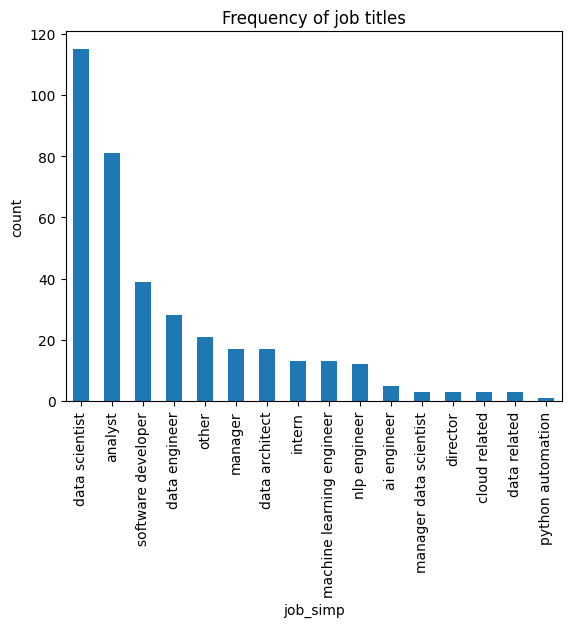

In [364]:
df.job_simp.value_counts().plot(kind = 'bar')
plt.ylabel('count')
plt.title('Frequency of job titles')
plt.show()

### `1.3 max salary offered in our dataset`

In [365]:
df.avg_salary.max()

np.float64(3250000.0)

In [366]:
df[df.avg_salary == df.avg_salary.max()]

company_name location              job_title  \
23        Adobe    Noida  computer scientist ii   

                                      job_description  rating  \
23  If you are applying for a role outside of your...     4.2   

    employer_estimate  min_salary  max_salary  avg_salary              Size  \
23                  1     2500000     4000000   3250000.0  10000+ Employees   

   Founded              Type                       Industry  \
23    1982  Company - Public  Computer Hardware Development   

                    Sector                 Revenue  \
23  Information Technology  $2 to $5 billion (USD)   

                                               skills   age  seniority  \
23   Azure, Data structures, Adobe Creative Suite,...  42.0        1.0   

   job_simp  
23    other

### `1.4 Let's calculate the avg salary by new job profiles`

In [367]:
avg_salaries_by_profile = df.groupby(['job_simp'])['avg_salary'].mean()

When you use {}, Python looks for a value to insert there, but without any formatting.
When you add :{...}, Python interprets everything after : as formatting instructions.
In our example, "{:,.0f}":

{ and } define where a value will be inserted.
: signals that there are special formatting rules coming next:
, is for thousands separator.
.0f means format as a float with zero decimal places.
So, {:,.0f} tells Python: "Format this value with commas for thousands, as a float, with no decimals."

In [368]:
# formatting the salaries represents them as strings
avg_salaries_by_profile.sort_values(ascending = False).apply(lambda x: "{:,.0f}".format(x))

job_simp
director                     1,200,000
manager data scientist         600,000
data related                   433,333
machine learning engineer      411,538
ai engineer                    370,000
other                          349,285
data scientist                 324,660
analyst                        271,932
software developer             253,269
intern                         239,230
data engineer                  234,999
nlp engineer                   226,166
cloud related                  216,666
data architect                 188,970
manager                        151,205
python automation                   -1
Name: avg_salary, dtype: object

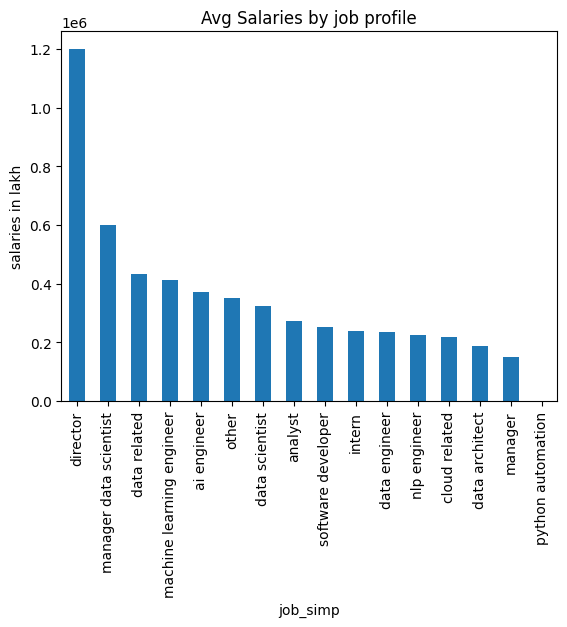

In [369]:
salaries = avg_salaries_by_profile.sort_values(ascending = False)#.apply(lambda x: astype(int(x)))
salaries.plot(kind = 'bar')
plt.ylabel('salaries in lakh')
plt.title("Avg Salaries by job profile")
plt.show()

In [370]:
df.groupby('job_simp')['avg_salary'].mean().reset_index() # this is exactly same as avg_salaries_by_profile without reset_index

job_simp    avg_salary
0                 ai engineer  3.699996e+05
1                     analyst  2.719315e+05
2               cloud related  2.166660e+05
3              data architect  1.889700e+05
4               data engineer  2.349995e+05
5                data related  4.333327e+05
6              data scientist  3.246604e+05
7                    director  1.200000e+06
8                      intern  2.392302e+05
9   machine learning engineer  4.115380e+05
10                    manager  1.512052e+05
11     manager data scientist  5.999997e+05
12               nlp engineer  2.261661e+05
13                      other  3.492850e+05
14          python automation -1.000000e+00
15         software developer  2.532686e+05

In [371]:
df.columns

Index(['company_name', 'location', 'job_title', 'job_description', 'rating',
       'employer_estimate', 'min_salary', 'max_salary', 'avg_salary', 'Size',
       'Founded', 'Type', 'Industry', 'Sector', 'Revenue', 'skills', 'age',
       'seniority', 'job_simp'],
      dtype='object')

In [372]:
numeric_cols = df.select_dtypes('number').columns

In [373]:
df.groupby(['job_simp','seniority'])[numeric_cols].mean()

rating  employer_estimate  \
job_simp                  seniority                                
ai engineer               0.0        3.800000           0.000000   
                          1.0        4.200000           0.000000   
                          2.0        4.000000           0.000000   
analyst                   0.0        3.916667           0.000000   
                          1.0        4.091489           0.056604   
                          2.0        4.075000           0.062500   
cloud related             1.0        3.600000           0.000000   
                          2.0        4.200000           0.000000   
data architect            1.0        3.900000           0.076923   
                          2.0        3.850000           0.000000   
data engineer             0.0        3.800000           0.000000   
                          1.0        4.113333           0.062500   
                          2.0        3.955556           0.100000   
data related              1.0        3.600000           0.500000   
                          2.0        3.600000           0.000000   
data scientist            0.0        3.903125           0.111111   
                          1.0        3.981818           0.031250   
                          2.0        4.033333           0.000000   
director                  2.0        4.200000           0.333333   
intern                    0.0        3.462500           0.000000   
                          1.0             NaN           1.000000   
machine learning engineer 0.0        3.800000           0.000000   
                          1.0        3.950000           0.000000   
                          2.0        4.100000           0.000000   
manager                   2.0        4.126667           0.117647   
manager data scientist    2.0        4.200000           0.000000   
nlp engineer              1.0        4.100000           0.000000   
                          2.0        4.160000           0.181818   
other                     1.0        3.963636           0.166667   
                          2.0        3.933333           0.111111   
python automation         1.0        4.200000           0.000000   
software developer        0.0        3.900000           0.000000   
                          1.0        3.854545           0.115385   
                          2.0        4.040000           0.000000   

                                        min_salary    max_salary  \
job_simp                  seniority                                
ai engineer               0.0        199999.500000  3.999995e+05   
                          1.0        600000.000000  9.000000e+05   
                          2.0        149999.500000  3.499995e+05   
analyst                   0.0        283332.916667  4.499996e+05   
                          1.0        179206.962264  3.180183e+05   
                          2.0        187499.375000  3.687494e+05   
cloud related             1.0            -1.000000 -1.000000e+00   
                          2.0        299999.500000  3.499995e+05   
data architect            1.0        114999.461538  2.946148e+05   
                          2.0         74999.250000  1.999992e+05   
data engineer             0.0         99999.500000  2.999995e+05   
                          1.0        200624.500000  3.756245e+05   
                          2.0        121999.400000  1.919994e+05   
data related              1.0        299999.500000  9.999995e+05   
                          2.0            -1.000000 -1.000000e+00   
data scientist            0.0        264666.266667  4.271329e+05   
                          1.0        230890.140625  3.869370e+05   
                          2.0        233332.833333  4.333328e+05   
director                  2.0        933333.000000  1.466666e+06   
intern                    0.0        208332.750000  3.083328e+05   
                          1.0         10000.000000  1.000000e+04   
machine learning engineer 

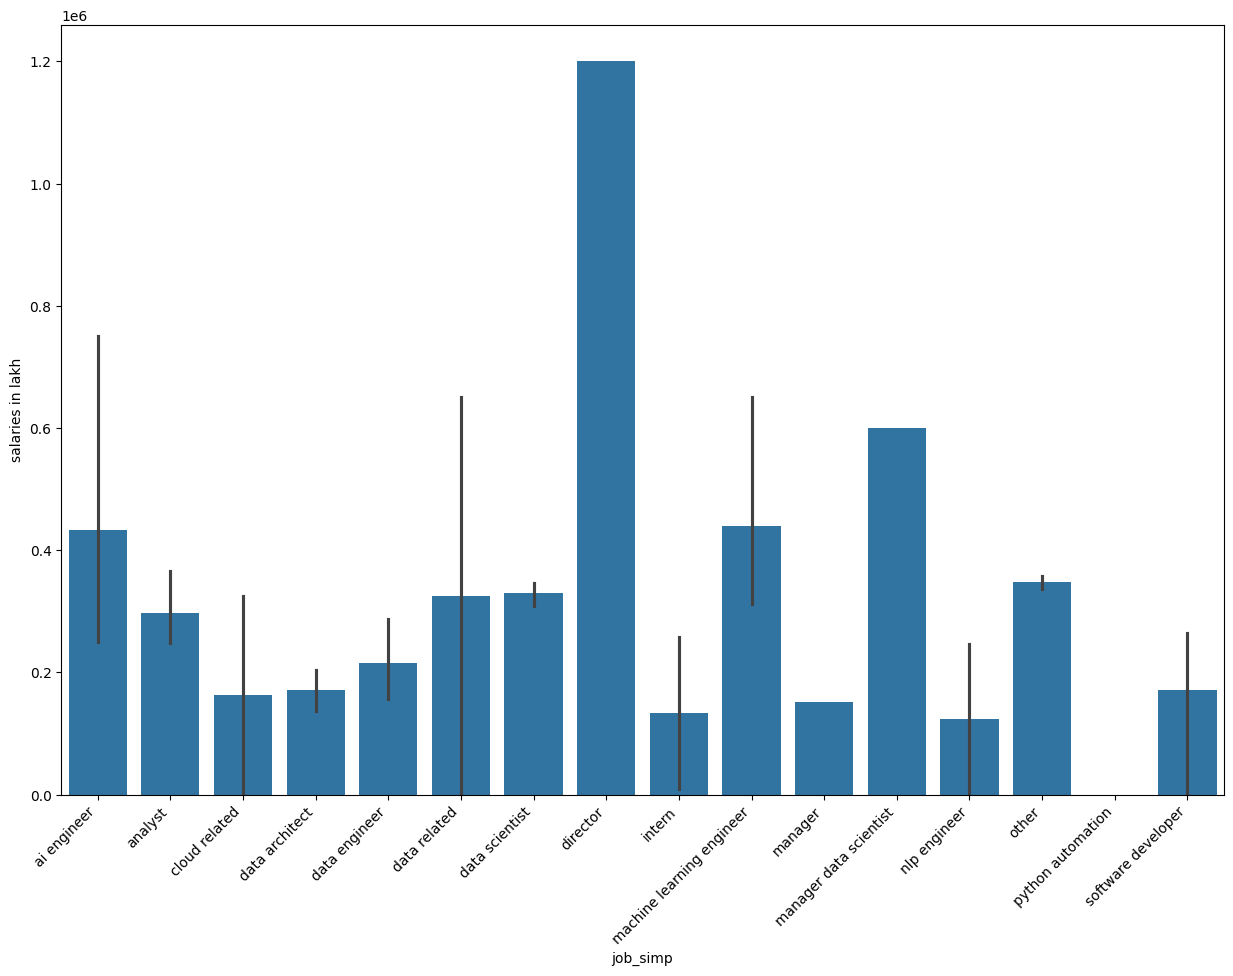

In [374]:
# in the below 2 graphs the python automation and data related job titles dont have the salary values 
# but one of them is shown and the other not because of the seniority tag being associated with the one shown in the graph
plt.figure(figsize = (15,10))
sns.barplot(data = df.groupby(['job_simp','seniority'])[numeric_cols].mean(), x = 'job_simp', y = 'avg_salary')
plt.ylabel('salaries in lakh')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

From the plot, we understand that job titles with wider CIs have more salary variation, and narrower CIs indicate more stable salary ranges within those categories.

Wider CI: It suggests that the range of possible values for the true average salary is broader, reflecting higher variability in the data or a smaller sample size. While it shows more uncertainty, it still maintains the same level of confidence (e.g., 95%) that the true mean lies within that interval.

Narrower CI: Indicates less variability and a more precise estimate of the average salary, suggesting that the values are clustered closer around the mean.

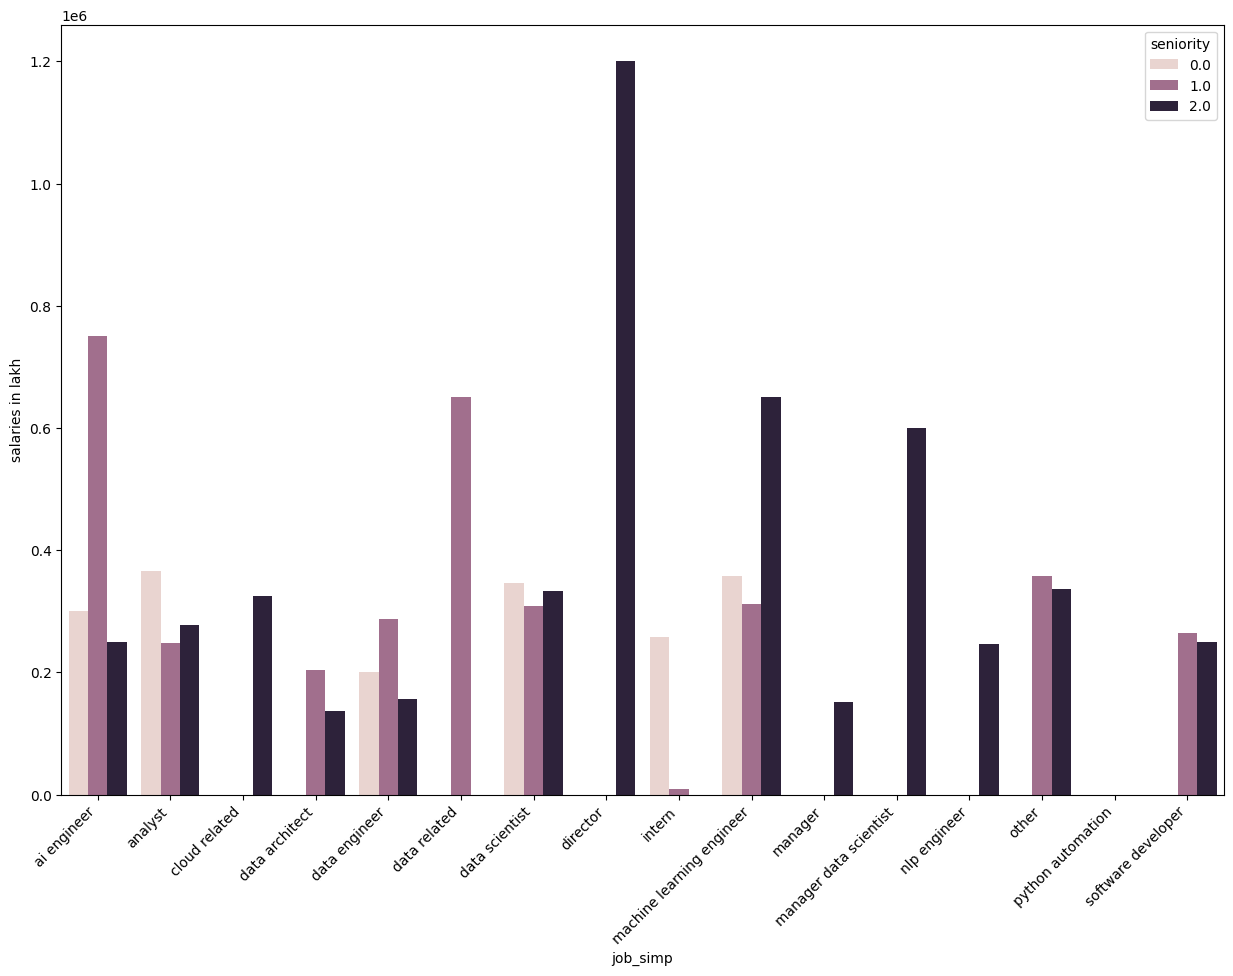

In [375]:
plt.figure(figsize = (15,10))
sns.barplot(data = df.groupby(['job_simp','seniority'])[numeric_cols].mean(), x = 'job_simp', y = 'avg_salary', hue = 'seniority')
plt.ylabel('salaries in lakh')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [376]:
# from the above barplot we can see that there is a huge difference in the salary of director from other professions
# and it is astonishing that the manager has the lowest salaryamong others .. 

In [377]:
df.loc[:50,['job_title','job_simp','skills']][df.job_simp == 'other']

job_title job_simp  \
5   senior computer scientist    other   
23      computer scientist ii    other   

                                               skills  
5    TensorFlow, Image processing, Azure, Kubernet...  
23   Azure, Data structures, Adobe Creative Suite,...

In [378]:
df.loc[:,['job_title','job_simp','skills','seniority','avg_salary']][df.job_simp == 'data related']

job_title      job_simp  \
149                 associate  data operations  data related   
221                 associate  data operations  data related   
263  lead engineer  salesforce  data  security  data related   

                                                skills  seniority  avg_salary  
149   Databases, SQL, Machine learning, Communicati...        1.0        -1.0  
221   Databases, SQL, Machine learning, Communicati...        1.0   1300000.0  
263   Customer service, Salesforce, Data structures...        2.0        -1.0

### 1.5 Seniority wise avg salary 
from the graph below it is clear that it is the natural trend in our data that the avg salary of junior level is coming out to be more than senior and mid level . Astonishing !

In [379]:
df.groupby(['seniority'])['avg_salary'].max().reset_index()

seniority  avg_salary
0        0.0   1000000.0
1        1.0   3250000.0
2        2.0   3050000.0

In [380]:
df.avg_salary[df.seniority == 0].mean()

np.float64(327693.3)

In [381]:
df.avg_salary[df.seniority == 1].mean()

np.float64(280548.1641025641)

In [382]:
df.avg_salary[df.seniority == 2].mean()

np.float64(286762.0505050505)

<Axes: xlabel='seniority', ylabel='avg_salary'>

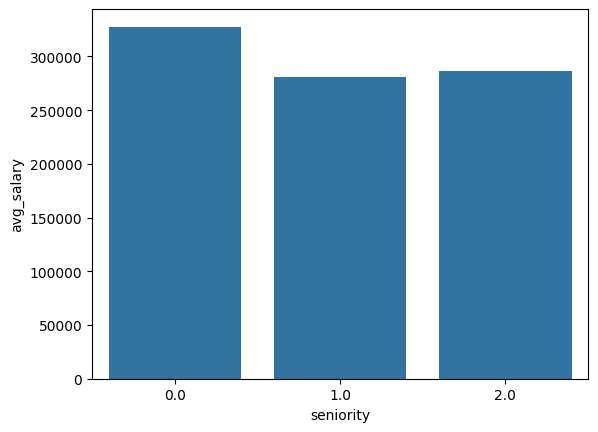

In [383]:
avg_salary_seniority_wise = df.groupby(['seniority'])['avg_salary'].mean().reset_index()
sns.barplot(data = avg_salary_seniority_wise, x = 'seniority', y = 'avg_salary')

In [384]:
# to see which level has the most frequency - mid level
df.seniority.value_counts()

seniority
1.0    195
2.0     99
0.0     80
Name: count, dtype: int64

In [385]:
df.seniority.value_counts().index

Index([1.0, 2.0, 0.0], dtype='float64', name='seniority')

## `2) maximum jobs are available in which location in our data`

In [386]:
df.location.value_counts() 

location
Bengaluru             96
Gurgaon               69
Pune                  42
Delhi                 41
Noida                 27
India                 20
Remote                17
Hyderābād             10
Chennai                9
Mumbai                 8
Salem                  4
Vadodara               4
Cochin                 4
Chandigarh             3
Ahmedabad              3
Calcutta               3
Maharashtra            2
Thiruvananthapuram     2
Amritsar               2
Visakhapatnam          2
Haryāna                1
Ghaziabad              1
Rājkot                 1
Coimbatore             1
Bhubaneshwar           1
Tamil Nadu             1
Name: count, dtype: int64

### `2.1 how location affects salary`

In [387]:
df.groupby('location')['avg_salary'].mean().sort_values(ascending = False).reset_index()

location      avg_salary
0              Haryāna  1000000.000000
1          Maharashtra   474999.500000
2               Remote   389117.294118
3                Noida   383332.777778
4               Mumbai   370937.125000
5             Vadodara   362499.500000
6                India   329624.550000
7              Gurgaon   319738.623188
8               Cochin   299999.500000
9                Delhi   297670.195122
10           Bengaluru   281770.302083
11             Chennai   278055.111111
12               Salem   274999.500000
13            Amritsar   274999.500000
14       Visakhapatnam   249999.500000
15  Thiruvananthapuram   249999.500000
16          Chandigarh   234999.666667
17                Pune   202380.261905
18           Ahmedabad   199999.333333
19           Hyderābād   149999.200000
20            Calcutta   133332.666667
21           Ghaziabad    13000.000000
22          Coimbatore       -1.000000
23        Bhubaneshwar       -1.000000
24              Rājkot       -1.000000
25          Tamil Nadu       -1.000000

##### We see that only a single record for job in haryana is present and it makes it bag the highest salary offering state according to our data ! - this could be an outlier

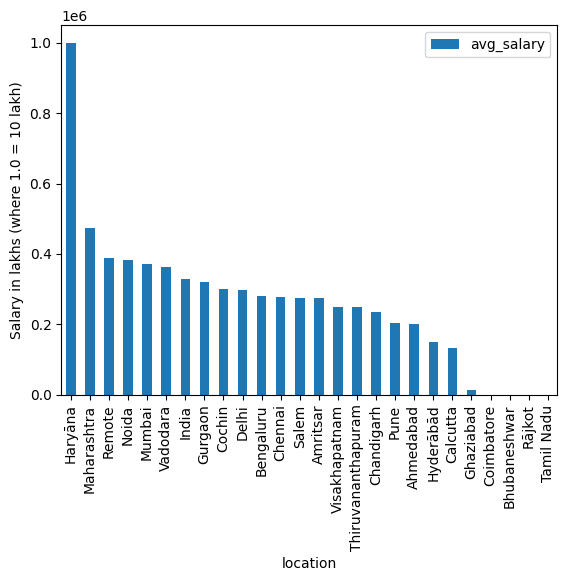

In [388]:
df.groupby('location')['avg_salary'].mean().sort_values(ascending = False).reset_index().plot(kind = 'bar', x = 'location')
plt.ylabel('Salary in lakhs (where 1.0 = 10 lakh)')
plt.show()


The sort_values() method behaves slightly differently when used on a Series compared to a DataFrame. Here are the key differences:

1. Usage on a Series:
Syntax: Series.sort_values(ascending=True, inplace=False, na_position='last')
Function: Sorts the values of the Series.
Key Parameters:
ascending: Boolean value that determines the sort order (True for ascending, False for descending).
inplace: If True, the sorting is done in place, modifying the Series; otherwise, it returns a new sorted Series.
na_position: Specifies the position of NaNs; 'last' (default) places NaNs at the end, 'first' places them at the beginning.
Example:
python
Copy code
series = pd.Series([3, 1, 2])
sorted_series = series.sort_values(ascending=False)
2. Usage on a DataFrame:
Syntax: DataFrame.sort_values(by, ascending=True, inplace=False, na_position='last')
Function: Sorts the DataFrame based on one or more columns.
Key Parameters:
by: Column name(s) to sort by (required).
ascending: Sort order, can be a single boolean or a list of booleans if sorting by multiple columns.
inplace: If True, the sorting modifies the DataFrame in place; otherwise, it returns a new sorted DataFrame.
na_position: Specifies the position of NaNs ('last' or 'first').

Example:
df = pd.DataFrame({'A': [3, 1, 2], 'B': [1, 2, 3]})
sorted_df = df.sort_values(by='A', ascending=False)

Key Differences:
Parameter Requirement: In a Series, you do not specify a column because a Series is a single column of data. In a DataFrame, you must specify the column(s) to sort by using the by parameter.
Sorting Scope: Sorting a Series affects only its values, while sorting a DataFrame can involve multiple columns and their relationships.
These differences are mainly due to the structural distinction between a Series (single column) and a DataFrame (multi-column).

## `3) Correlation between diff columns` 

In [389]:
df[numeric_cols].corr()

rating  employer_estimate  min_salary  max_salary  \
rating             1.000000           0.093805    0.027368    0.017980   
employer_estimate  0.093805           1.000000    0.167759    0.180795   
min_salary         0.027368           0.167759    1.000000    0.914714   
max_salary         0.017980           0.180795    0.914714    1.000000   
avg_salary         0.022167           0.179304    0.968708    0.986390   
age                0.115871           0.000342    0.032788    0.012837   
seniority          0.188271           0.024383   -0.036890   -0.027811   

                   avg_salary       age  seniority  
rating               0.022167  0.115871   0.188271  
employer_estimate    0.179304  0.000342   0.024383  
min_salary           0.968708  0.032788  -0.036890  
max_salary           0.986390  0.012837  -0.027811  
avg_salary           1.000000  0.021174  -0.032091  
age                  0.021174  1.000000   0.037562  
seniority           -0.032091  0.037562   1.000000

### this is really an anomalous observation that the avg salary is negatively correlated to seniority level !
That means as seniority increases , salary decreases !

## `4) Distributions of various columns and their correlations with the salary column`

In [390]:
# to choose the type of scaling method for our columns to see the heatmap clearly , we can try finding the distributions ofvarious columns of the dataset
df.columns

Index(['company_name', 'location', 'job_title', 'job_description', 'rating',
       'employer_estimate', 'min_salary', 'max_salary', 'avg_salary', 'Size',
       'Founded', 'Type', 'Industry', 'Sector', 'Revenue', 'skills', 'age',
       'seniority', 'job_simp'],
      dtype='object')

In [391]:
df.shape

(374, 19)

<Axes: >

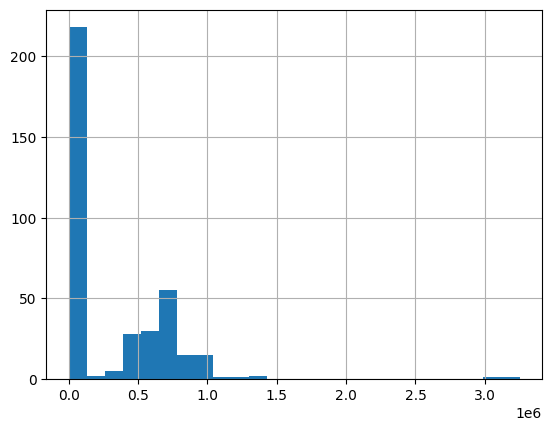

In [392]:
df['avg_salary'].hist(bins = 25)

<Axes: xlabel='avg_salary', ylabel='Density'>

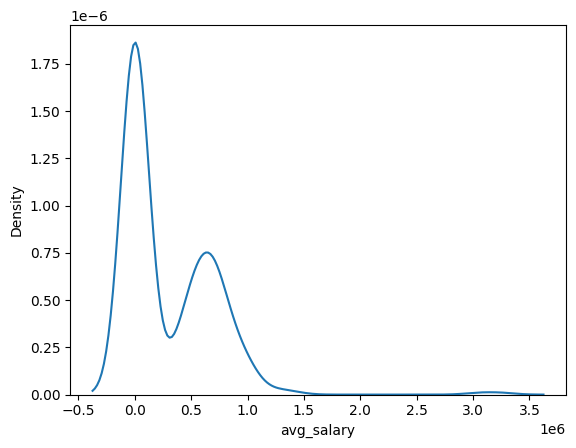

In [393]:
sns.kdeplot(df['avg_salary'])

In [394]:
df.select_dtypes('number').columns

Index(['rating', 'employer_estimate', 'min_salary', 'max_salary', 'avg_salary',
       'age', 'seniority'],
      dtype='object')

Histograms and KDE plots work on different scales by default:

The histogram shows the count (or frequency) of data points in each bin by default, which depends on the size of the dataset.
The KDE (Kernel Density Estimate) is a smoothed probability density function. It normalizes the data, so the area under the curve sums to 1.

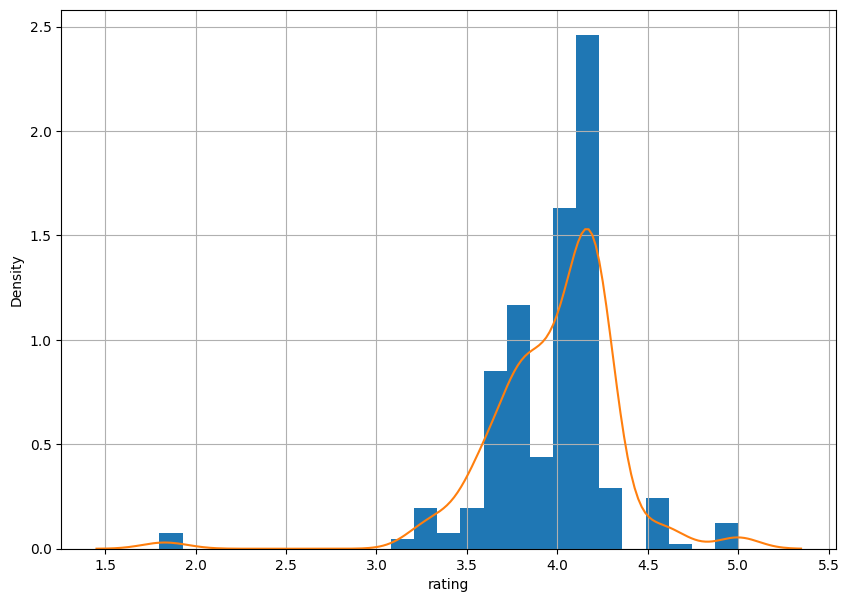

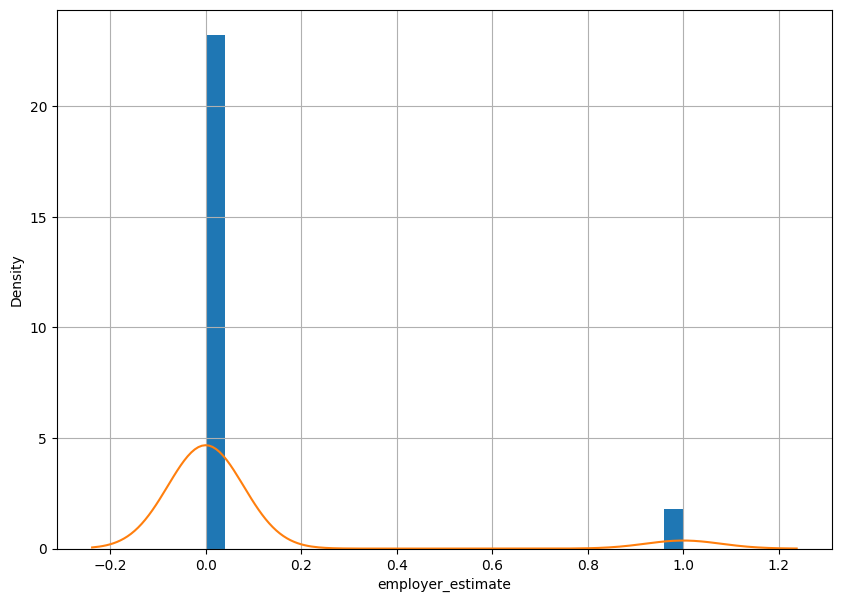

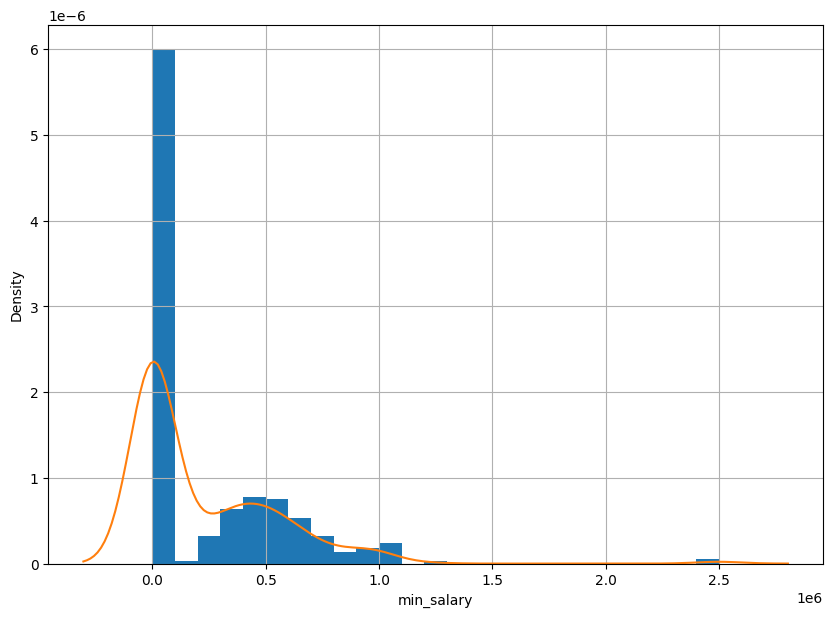

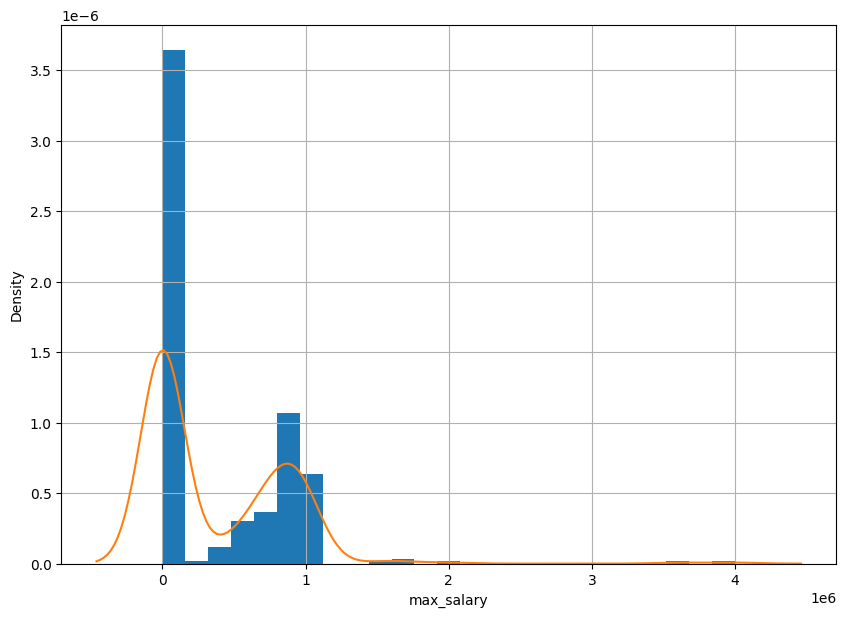

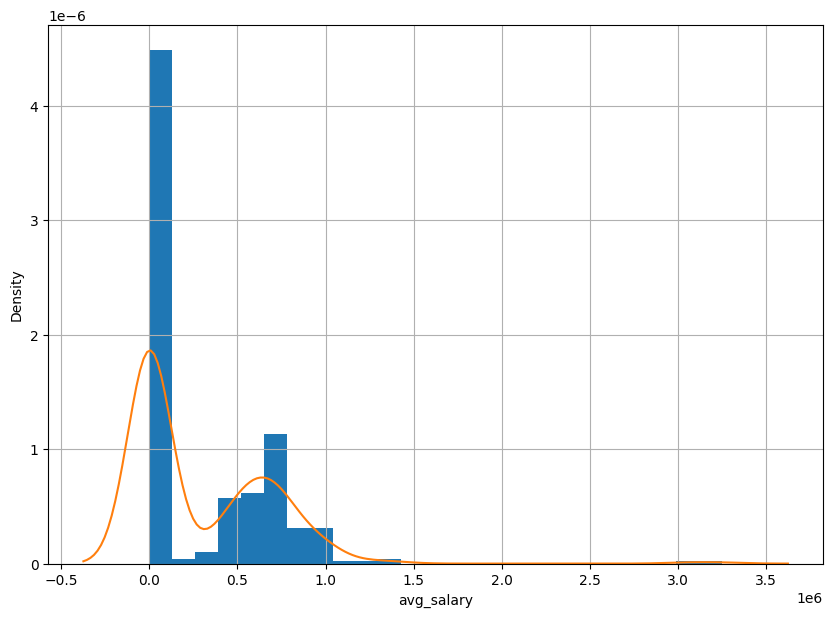

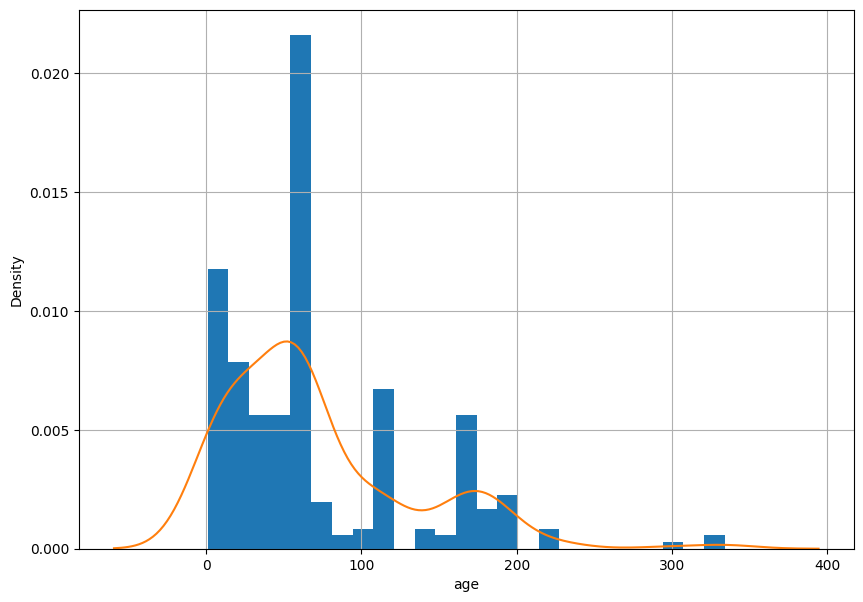

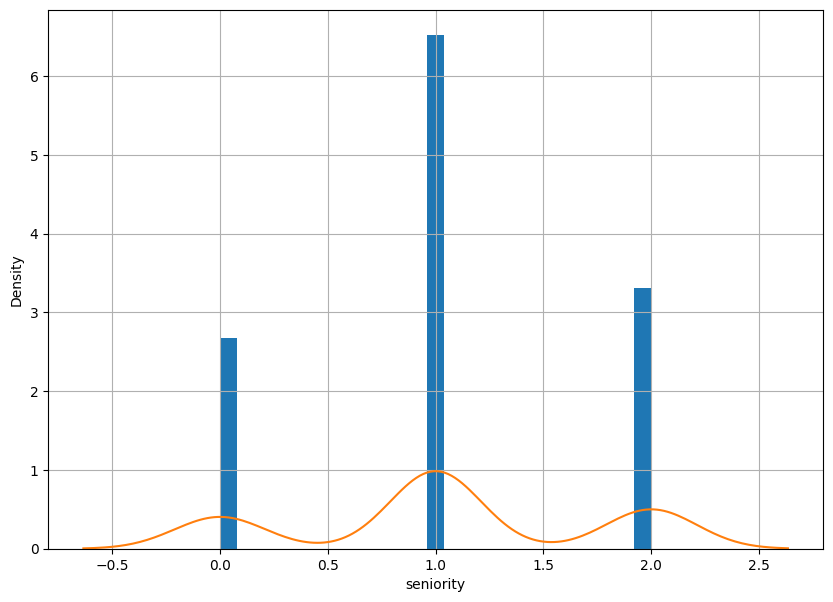

In [395]:
for col in numeric_cols:
    plt.figure(figsize = (10,7))
    df[col].hist(bins = 25, density = True)
    sns.kdeplot(df[col])

Train-test split and scaling will be done during modeling phase

In [396]:
# we noticed we mostly have skewed data so maybe we can apply minmax scaling
# we can even try later during modelling which scaler gives us better accuracy

# also before scaling we require train_test_split
# and we also know that we decided to keep the -1 values salary columns rows as the test set , so lets do it

# Filter once for training data
#train_data = df[df['avg_salary'] != -1]

# Now split into features (xtrain) and target (ytrain) this was required for the modelling phase purpose but since we are still in eda phase,
# we can scale both features and target column together
#xtrain = train_data.drop('avg_salary', axis=1)
#ytrain = train_data['avg_salary']  # Selecting a single column doesn't need .loc

# For test data
#xtest = df[df['avg_salary'] == -1].drop('avg_salary', axis=1)

In [397]:
df.shape

(374, 19)

In [398]:
df[df['avg_salary'] != -1].shape

(173, 19)

In [399]:
df[df['avg_salary'] == -1].shape

(201, 19)

In [400]:
# also note that we do not need the min max salary and job_title because we have avg salary and job_simp
#train_data = train_data.drop(columns = ['job_title','min_salary', 'max_salary'])

In [401]:
# min_max_scaler = MinMaxScaler()
# #xtrain_trf = min_max_scaler.fit_transform(xtrain)
# #xtest_trf = min_max_scaler.transform(xtest)

# train_scaled = pd.DataFrame(min_max_scaler.fit_transform(train_data.select_dtypes(include=['number'])),
#                         columns=train_data.select_dtypes(include=['number']).columns)

In [402]:
#train_scaled.dropna() # due to scaling our seniority column lost its ordinal behaviour
# thus its corr got affected and became positive with avg_salary

#### No proper relationship and correlations seen between columns

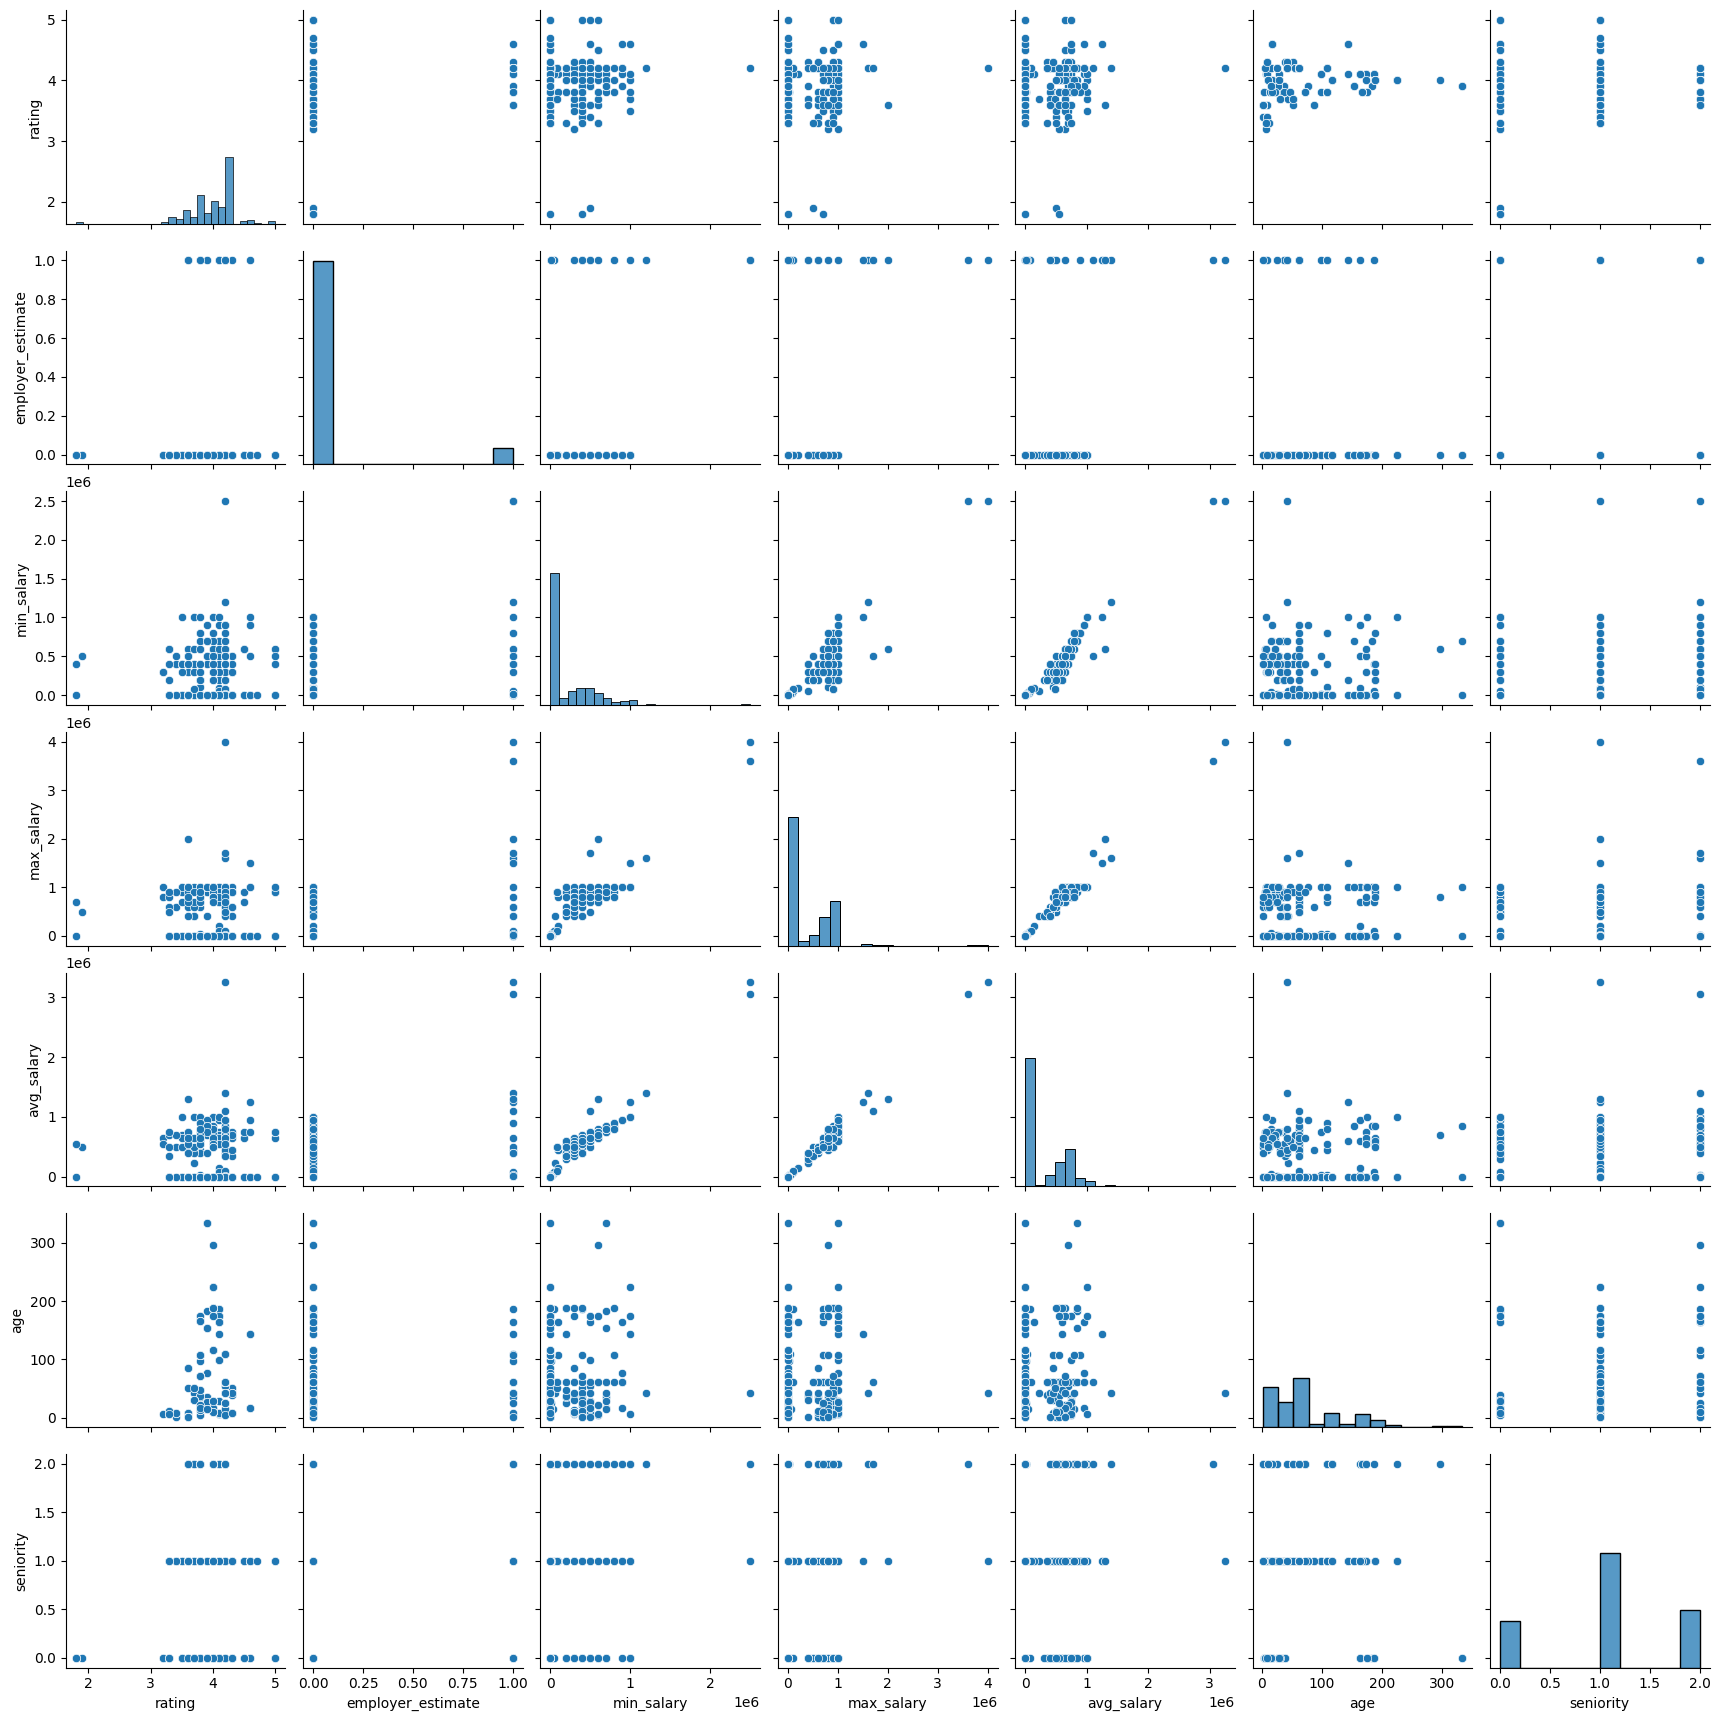

In [403]:
sns.pairplot(df)

In [404]:
#sns.heatmap(train_scaled.corr(), annot = True) # without including the categorical columns we are not seeing any particular strongly related column with avg_salary column
# so lets try encoding and scaling with categorical data columns as well and then plotting correlations
# but before looking into the correlations of categorical columns with salary column lets plot the bar graphs for each one

In [405]:
# xtrain = df[df['avg_salary'] != -1].drop('avg_salary', axis = 1)
# xtest = df[df['avg_salary'] == -1].drop('avg_salary', axis = 1)

# ytrain = df[df['avg_salary'] != -1].loc[:,'avg_salary']

<Axes: >

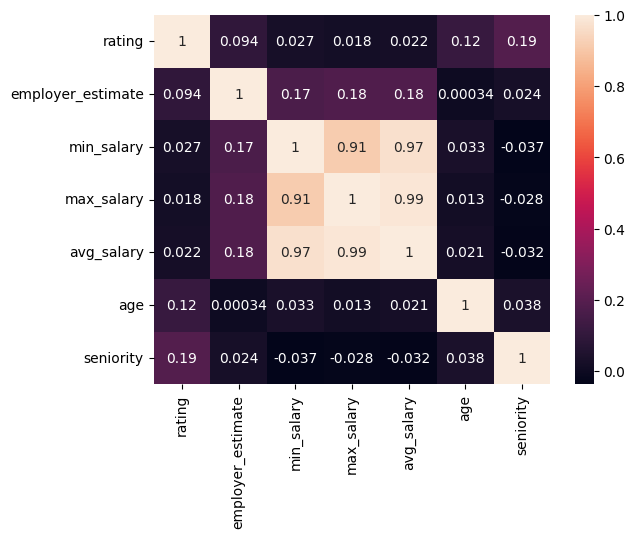

In [406]:
sns.heatmap(df.select_dtypes(['number']).corr(), annot = True) 

## `5) how the age of the company affects salary`

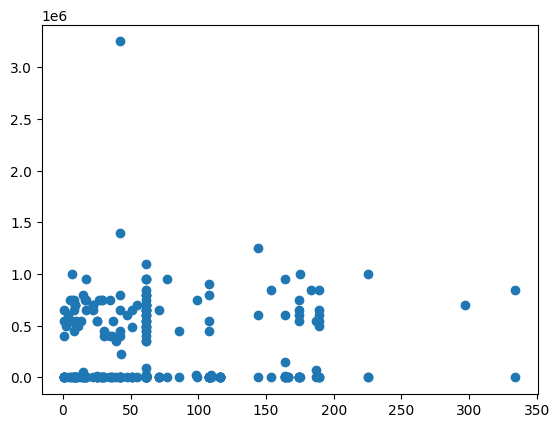

In [407]:
plt.scatter(df['age'], df['avg_salary']) # there is no linear relation between age and salary .. no trend as age of company inc then salary of employee inc or dec

## `6) Barplots of various categorical columns with avg_salary`

In [408]:
catcols = df.select_dtypes(['object']).columns
catcols

Index(['company_name', 'location', 'job_title', 'job_description', 'Size',
       'Founded', 'Type', 'Industry', 'Sector', 'Revenue', 'skills',
       'job_simp'],
      dtype='object')

In [409]:
df[catcols[0]].value_counts()

company_name
Boston Consulting Group    77
Cencora                    14
BOEING                     13
Adobe                       9
ANZ Banking Group           8
                           ..
The Trade Desk              1
SmartHelio                  1
RP2                         1
Recruitment Smart           1
Isaac Luxe                  1
Name: count, Length: 123, dtype: int64

### does the size of the company affect the salary - NO from below barplot of size with avg_salary

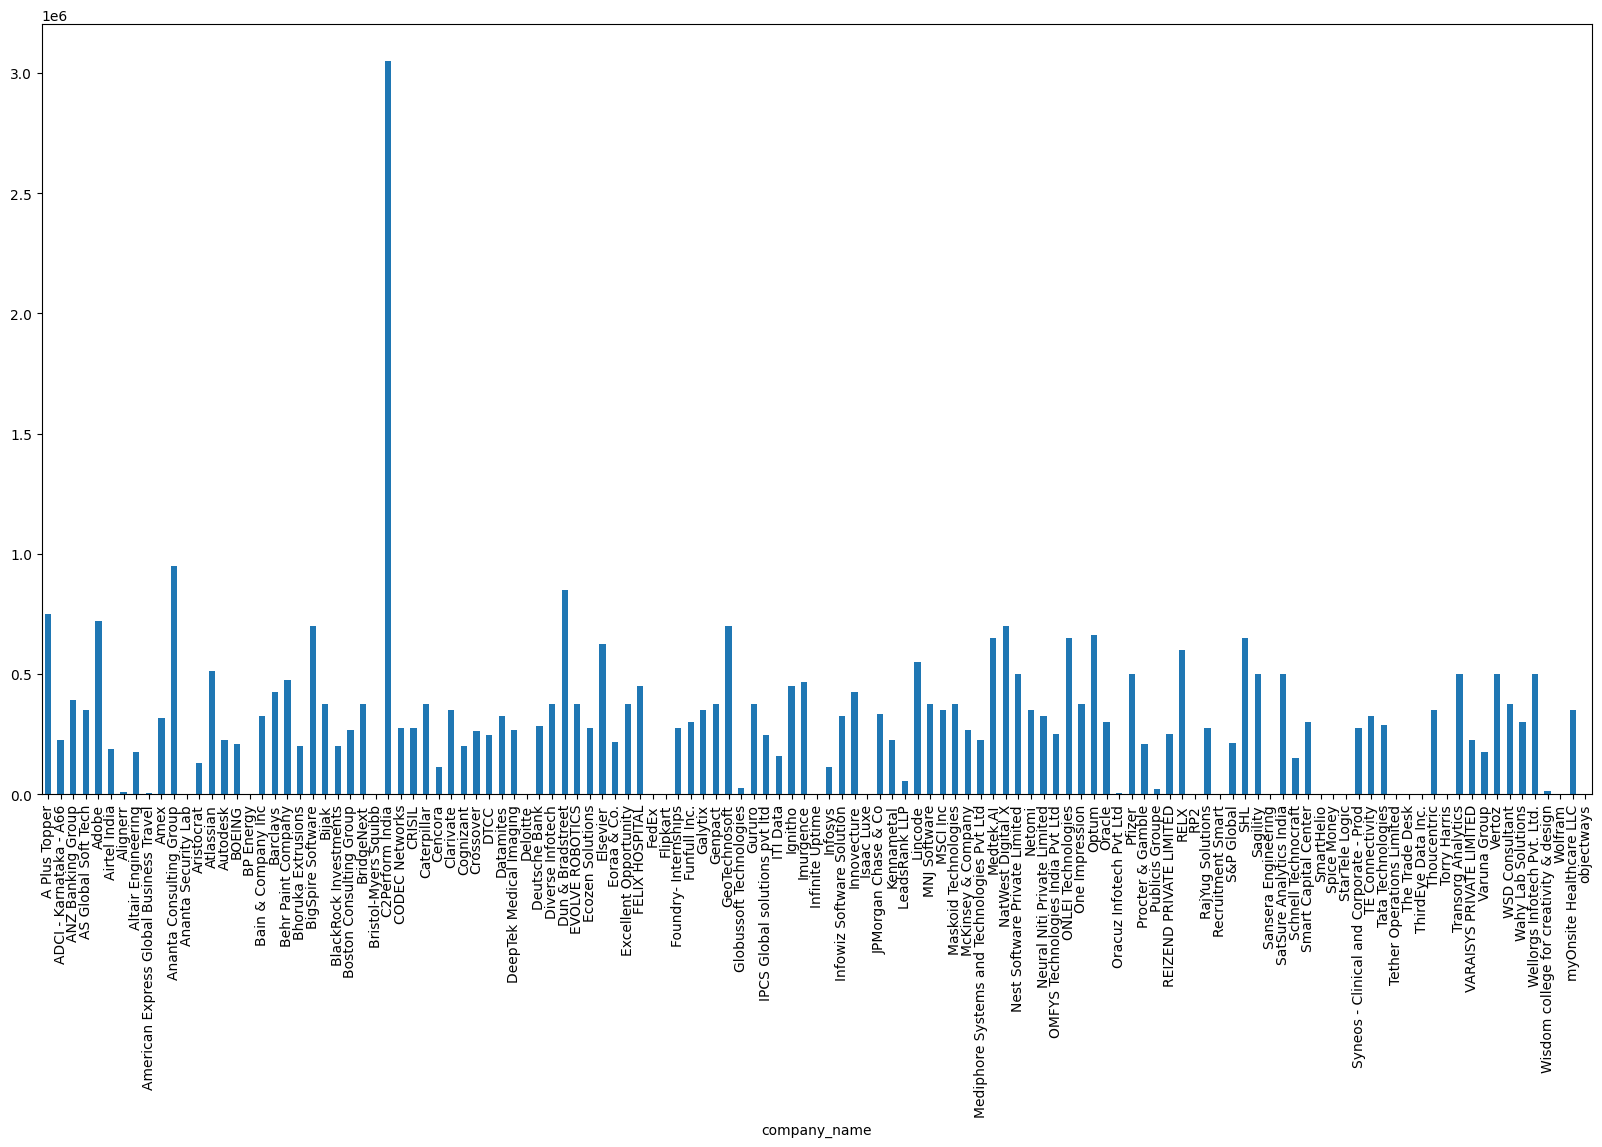

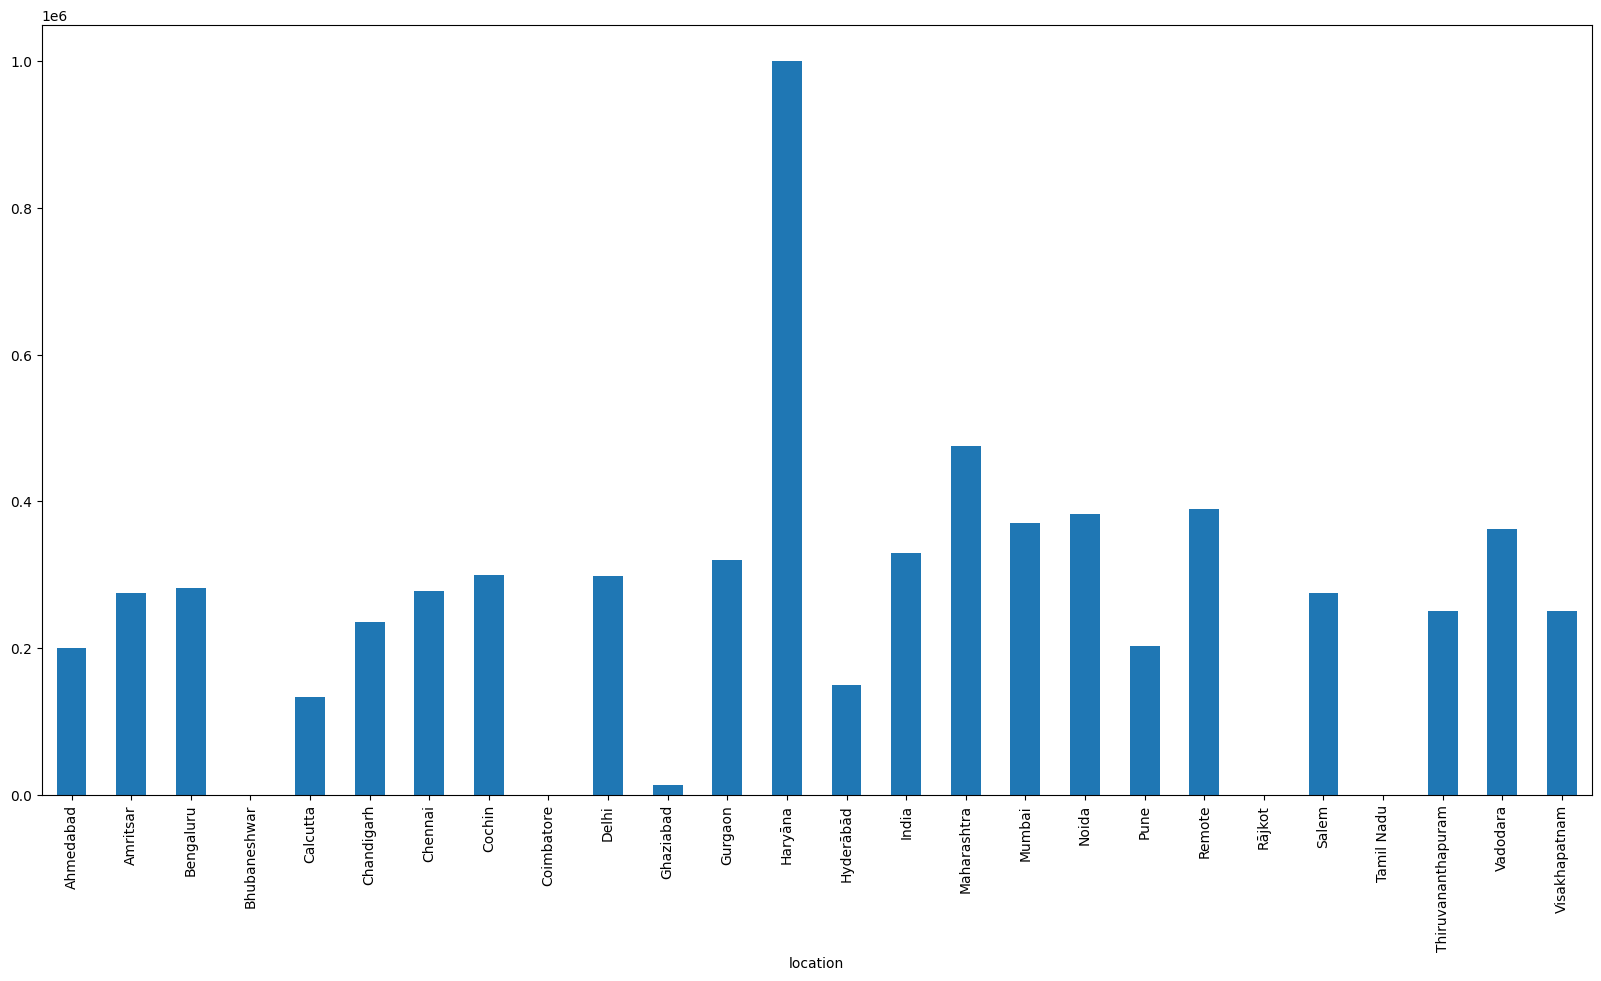

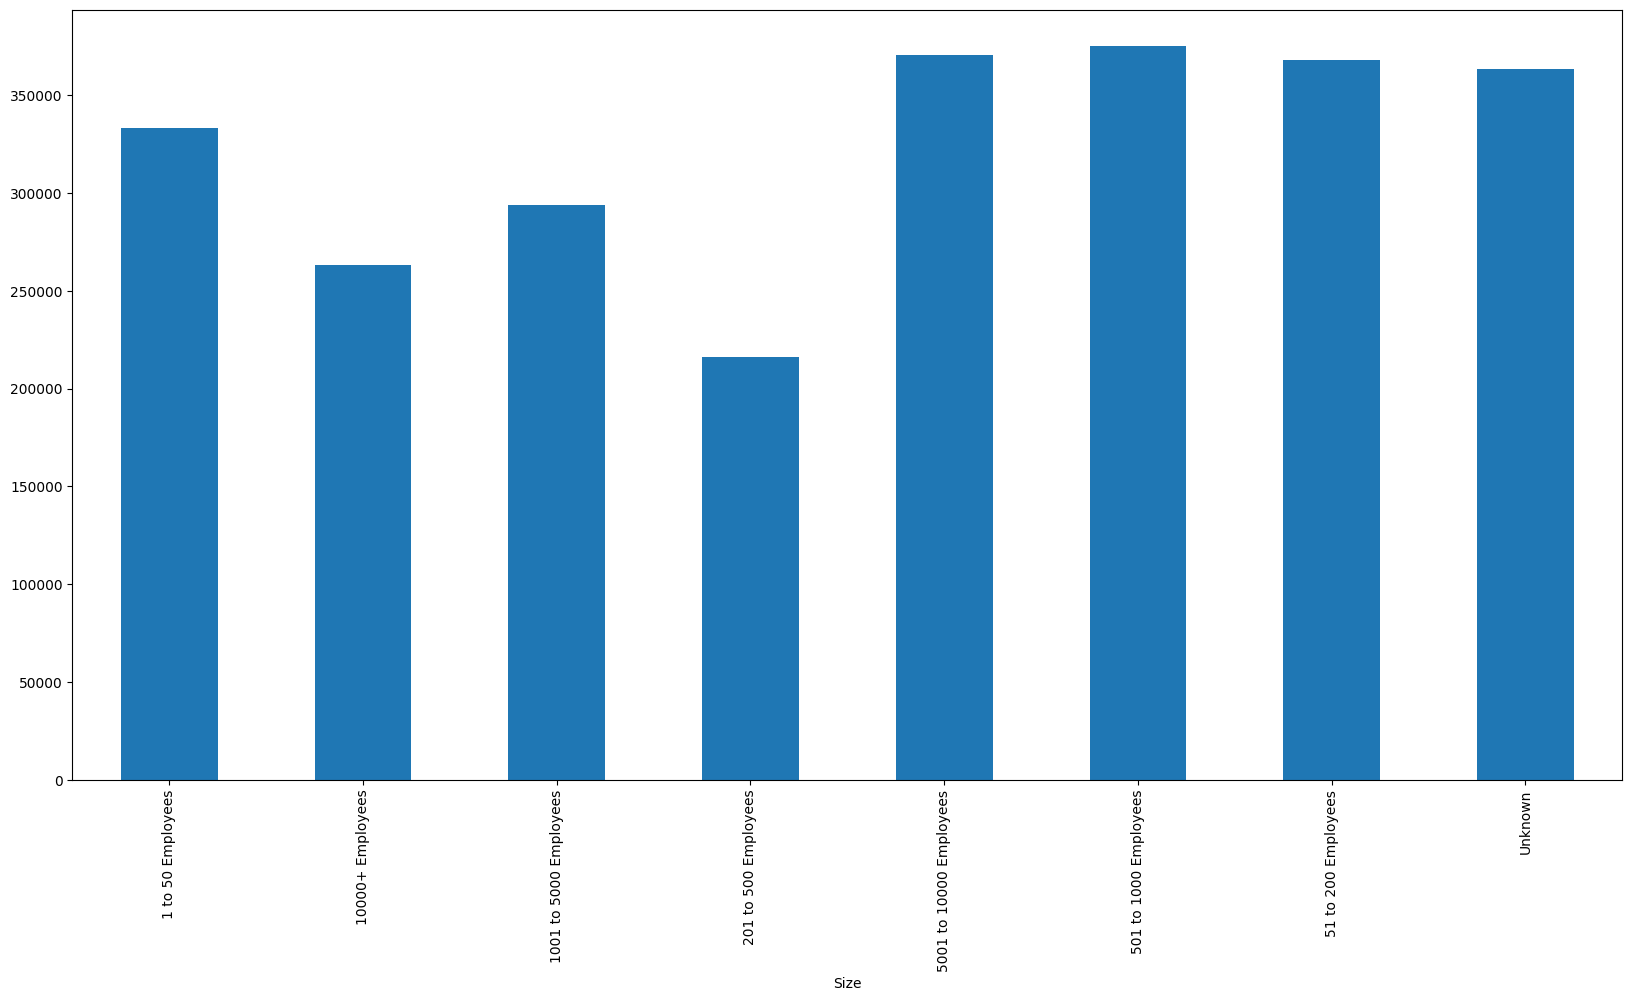

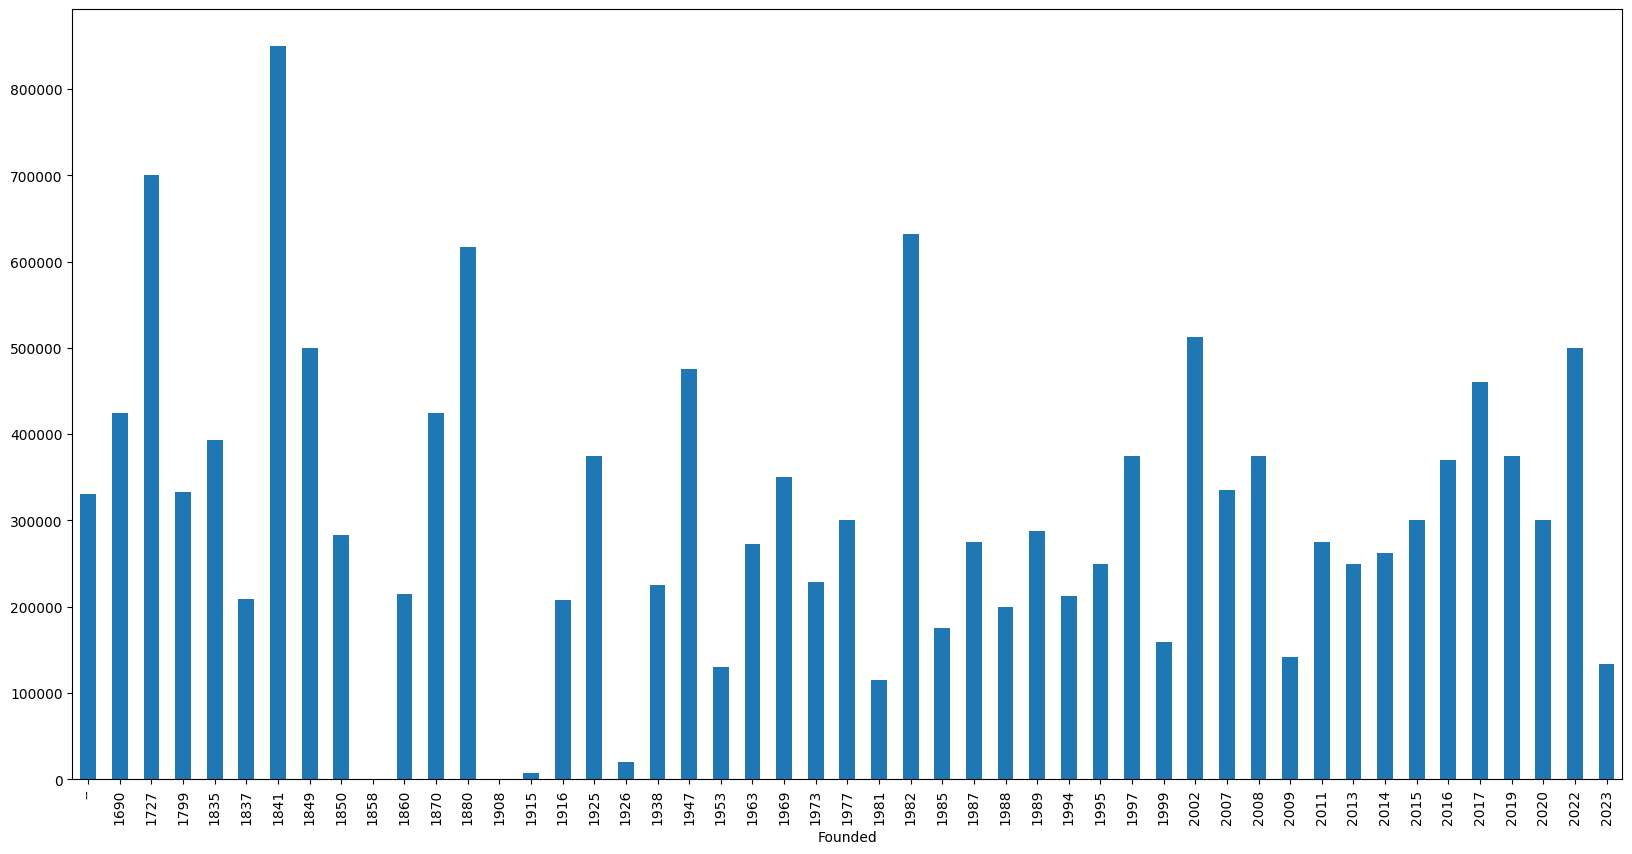

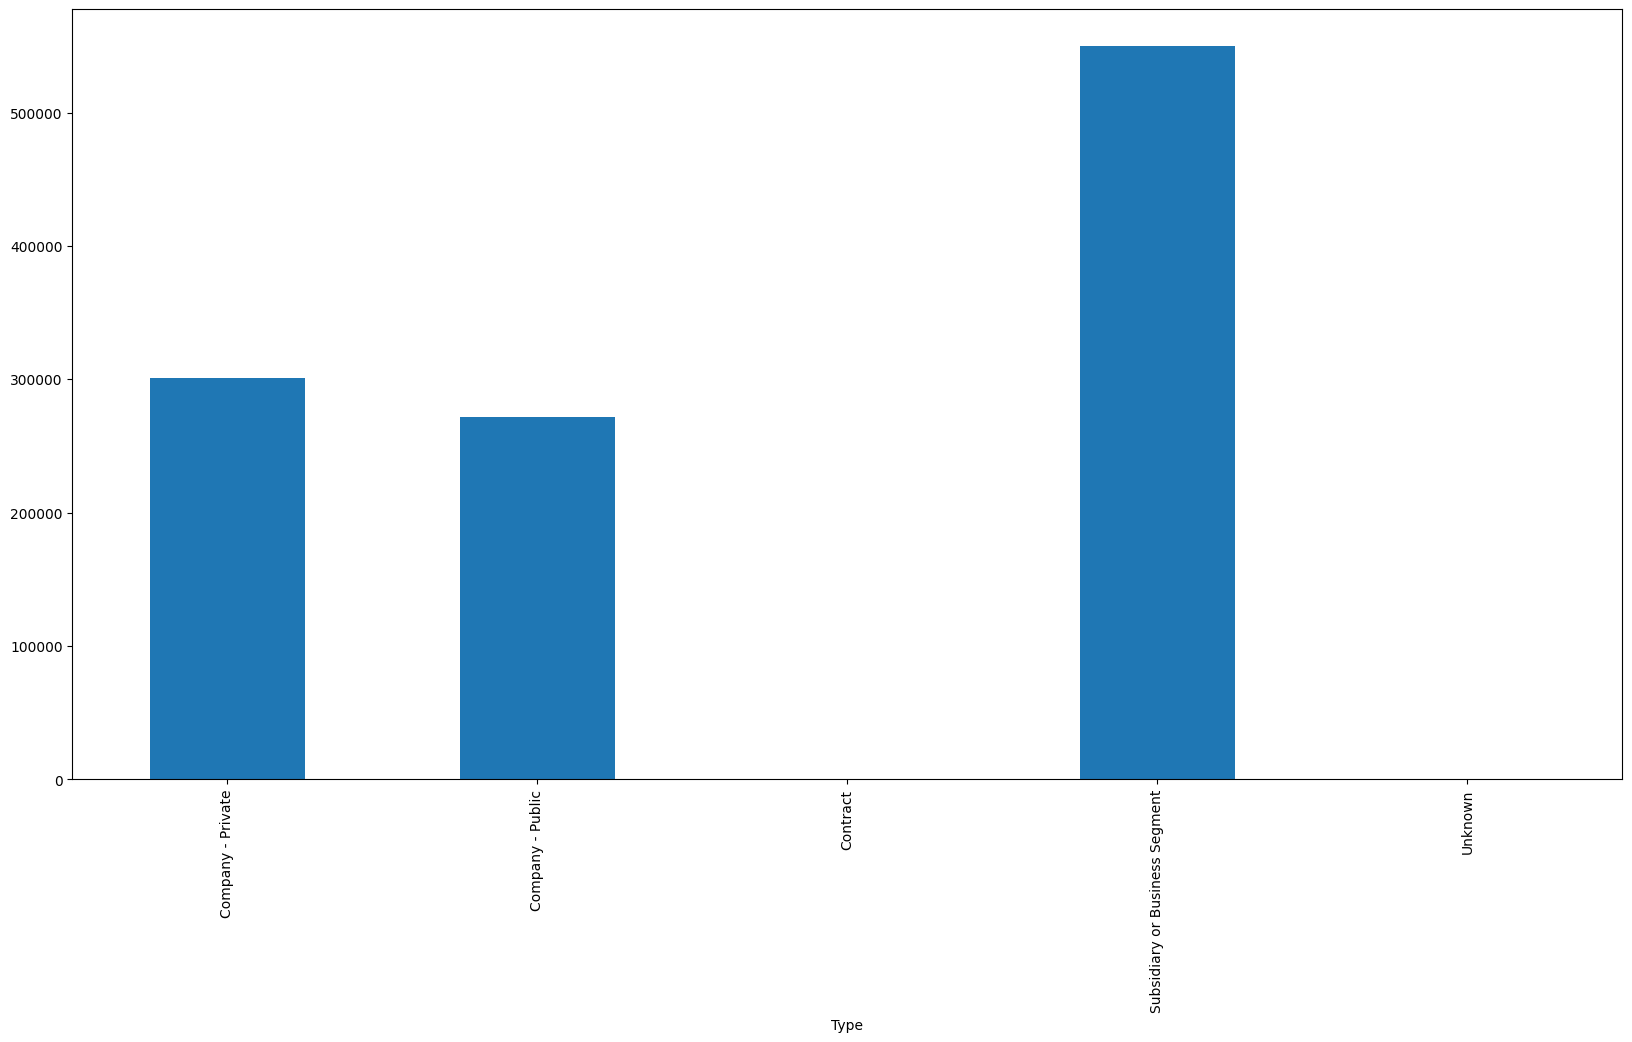

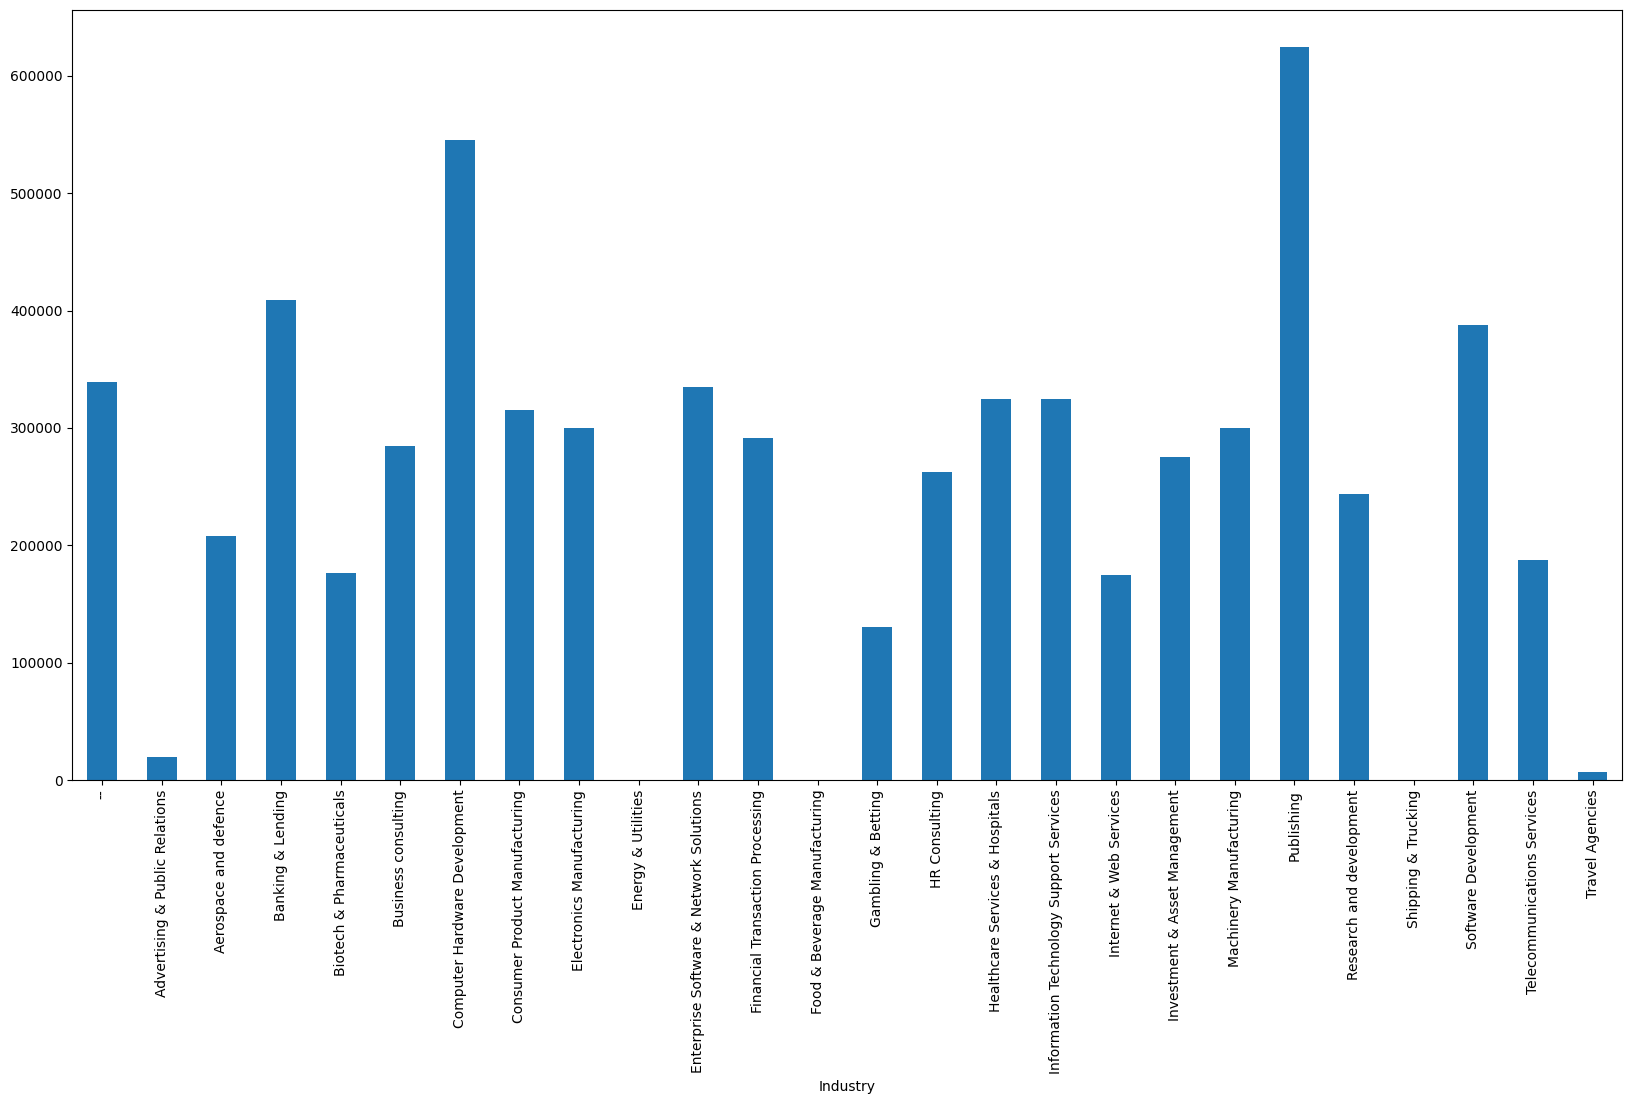

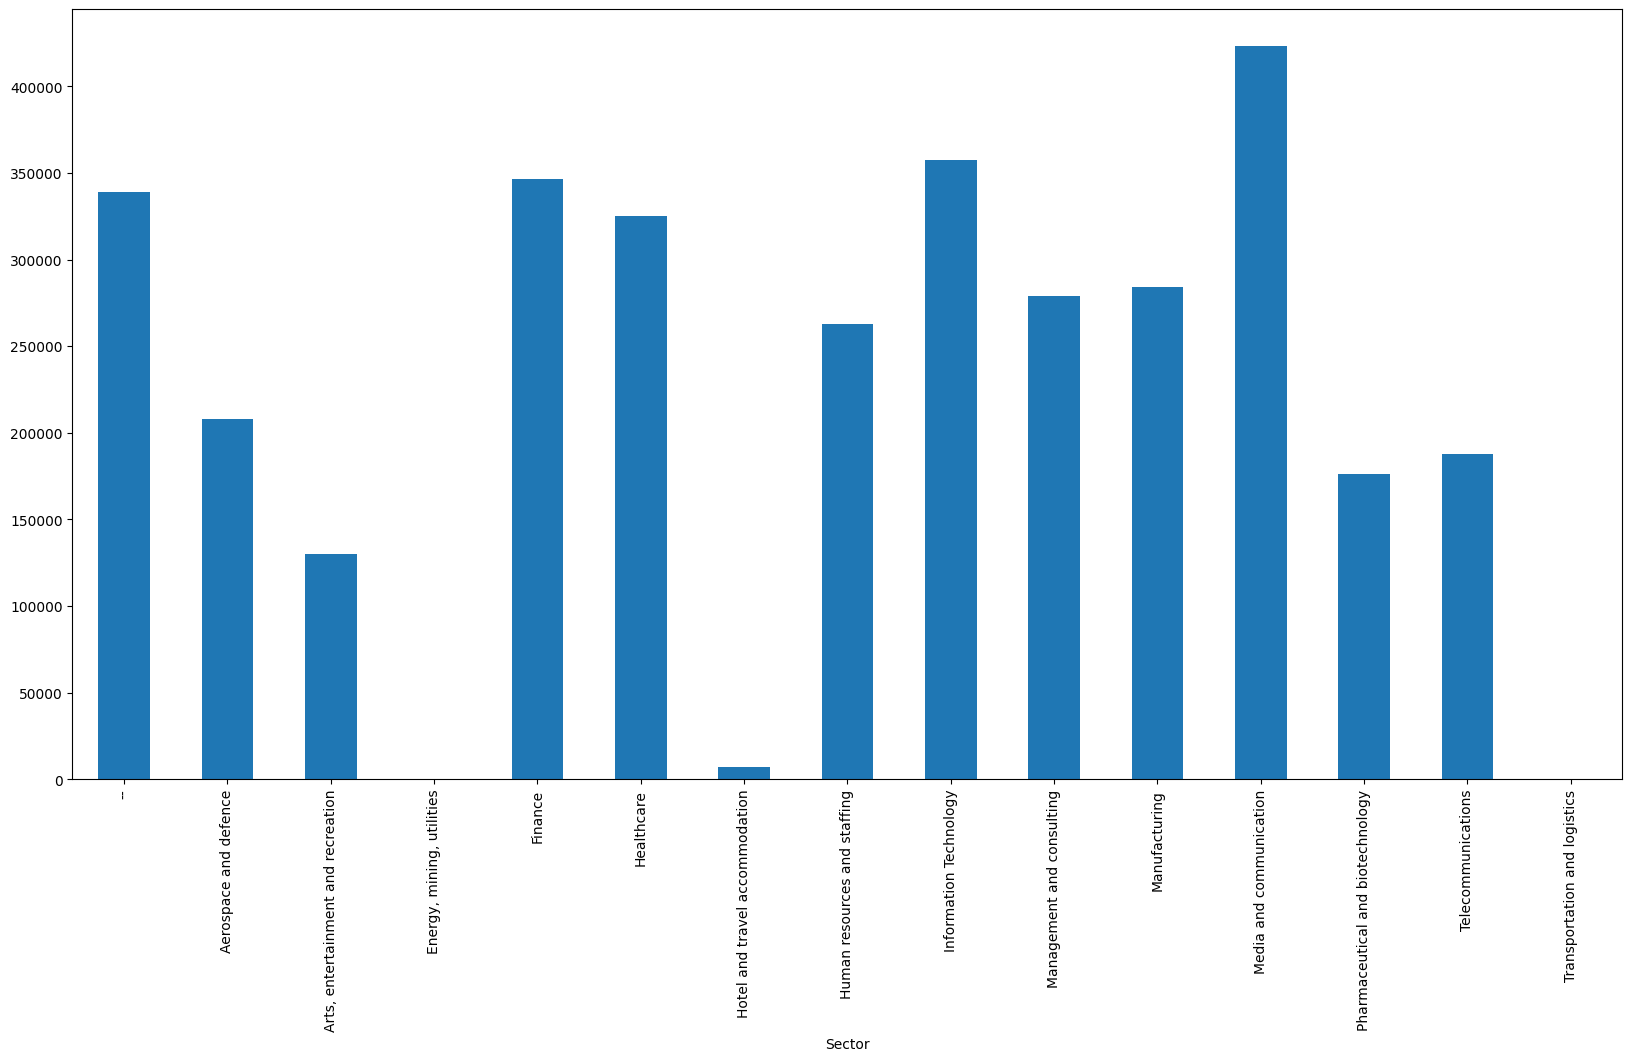

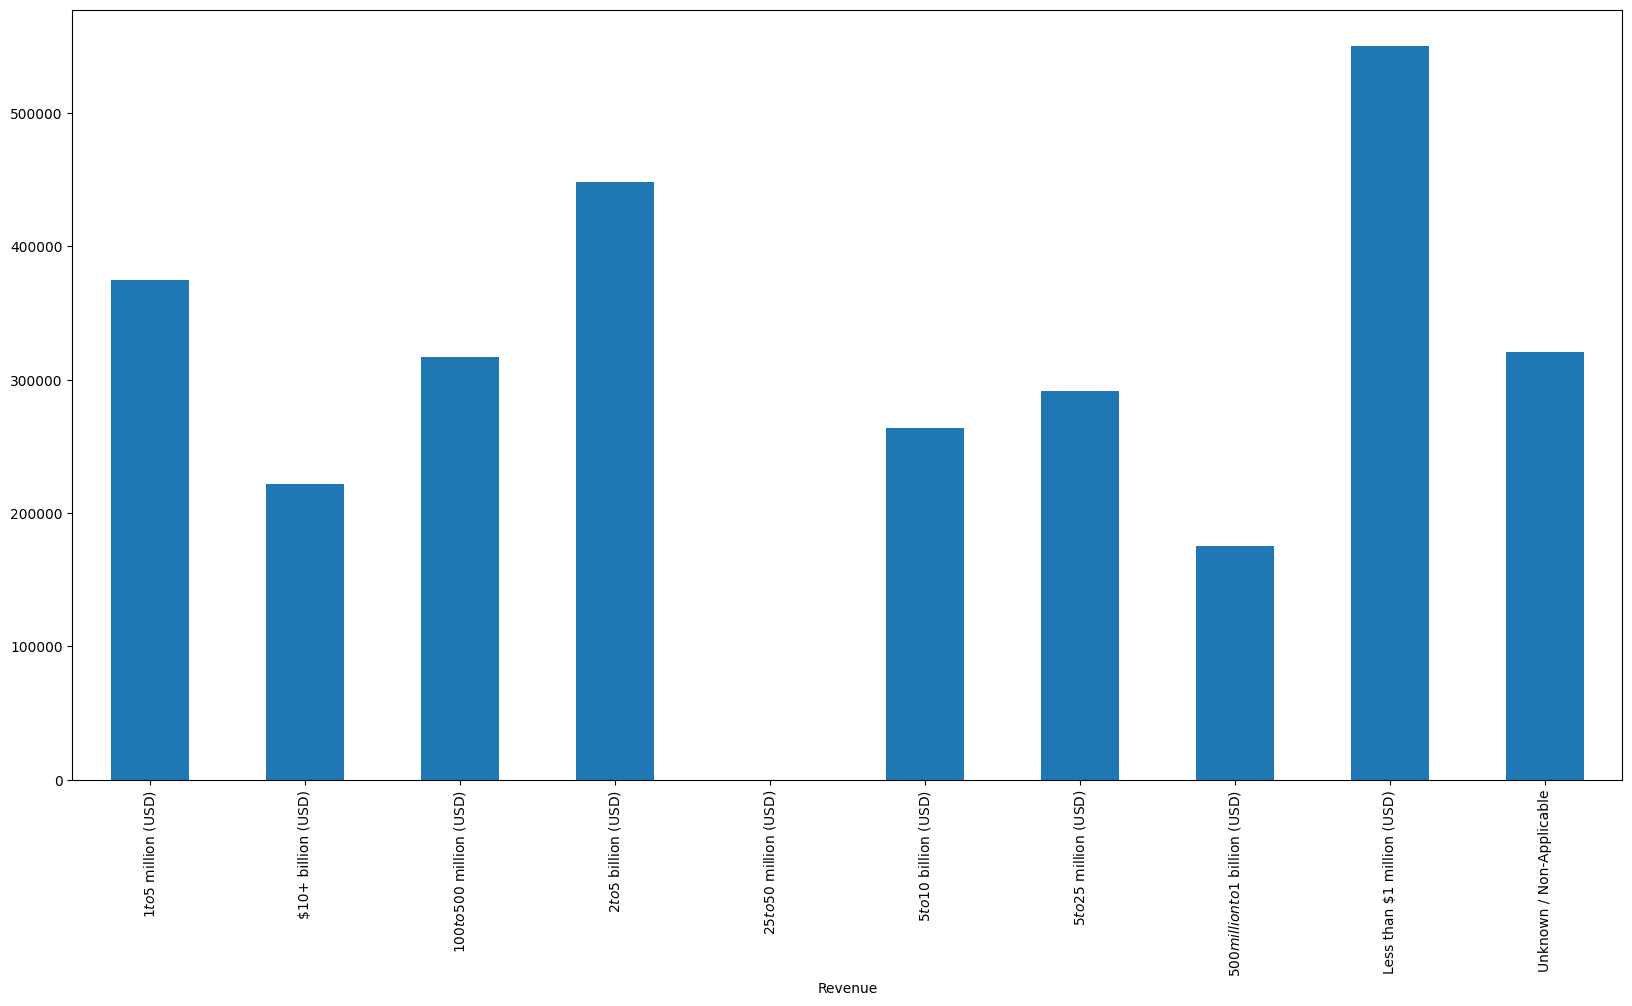

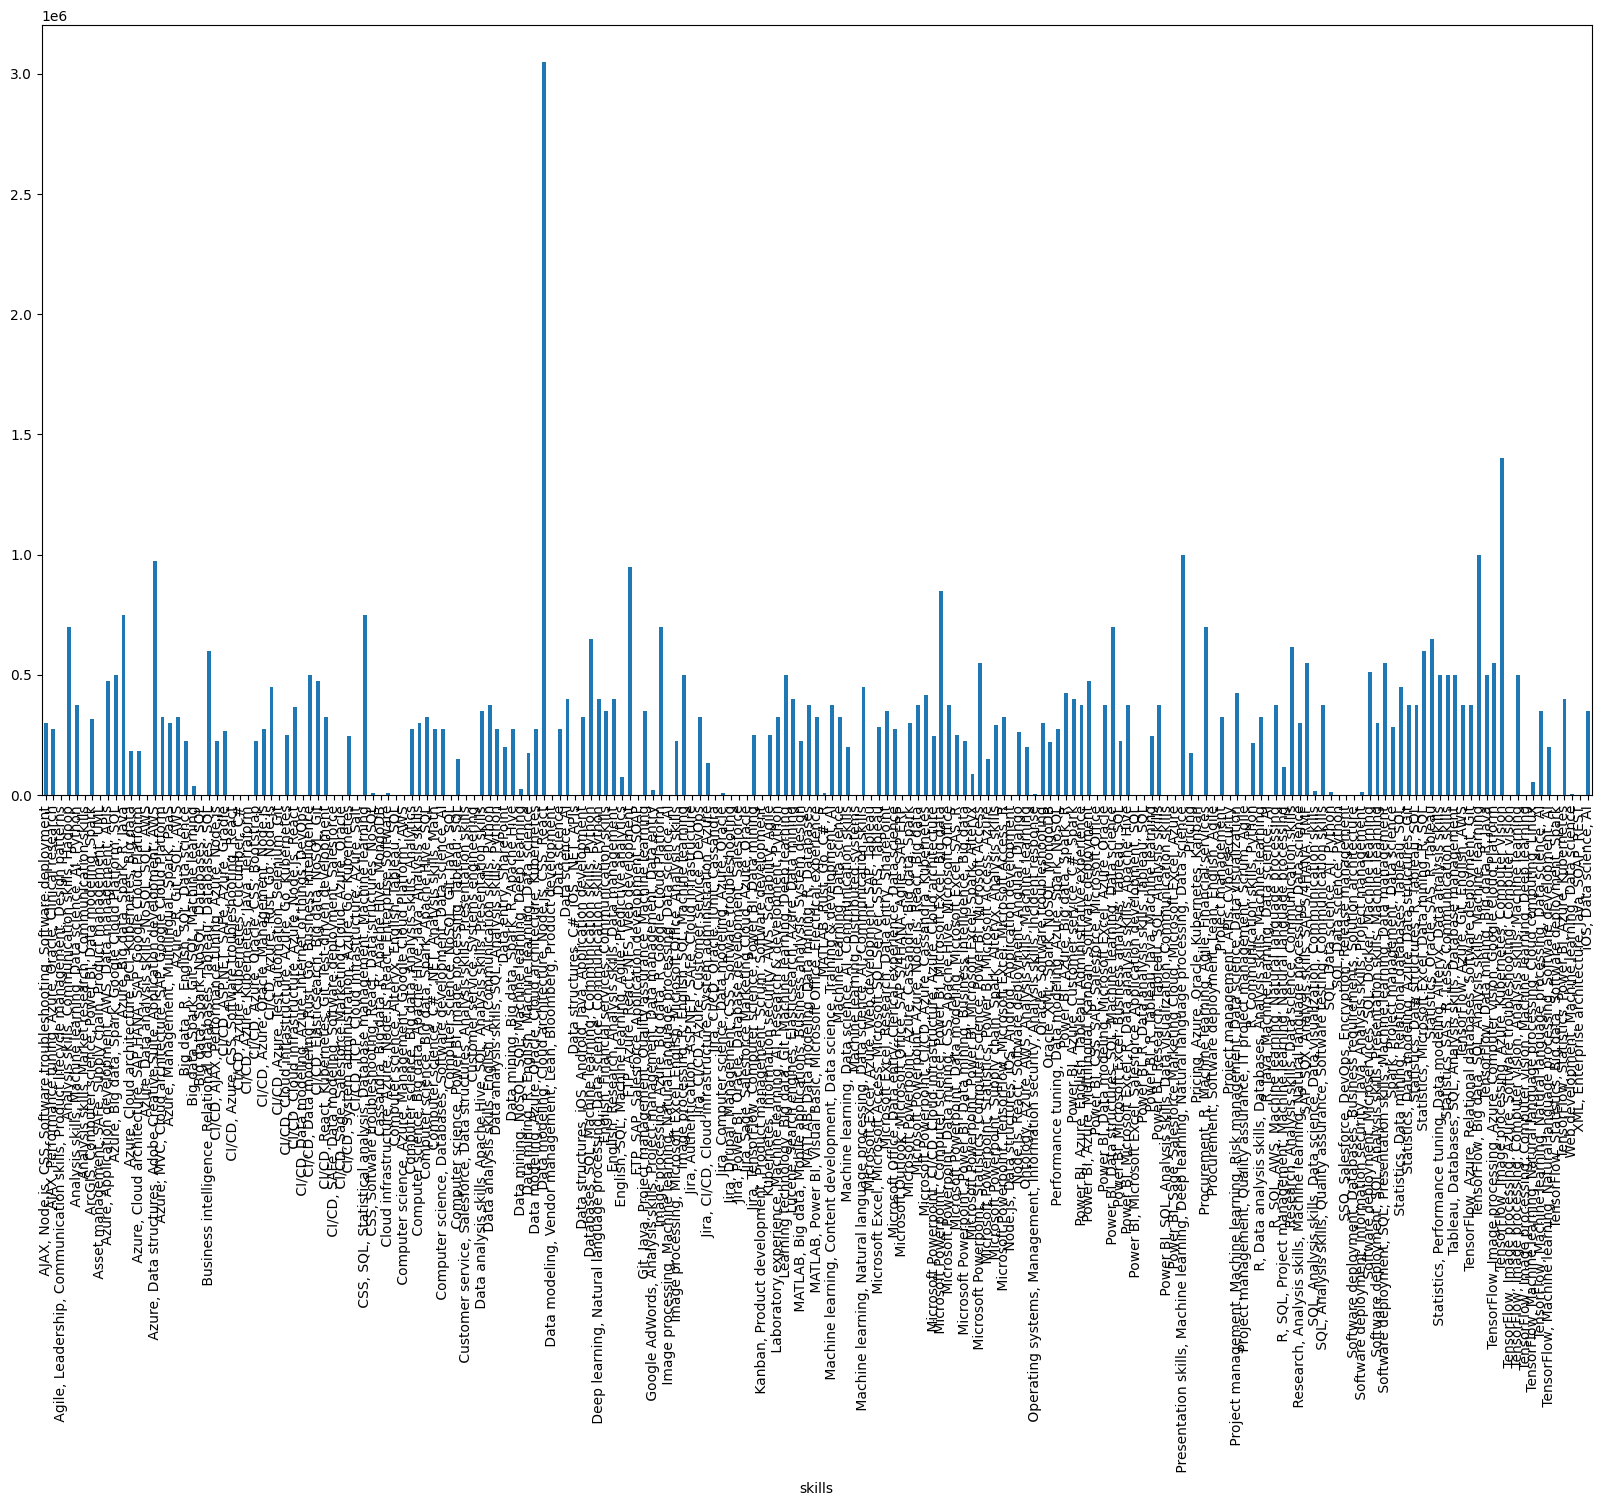

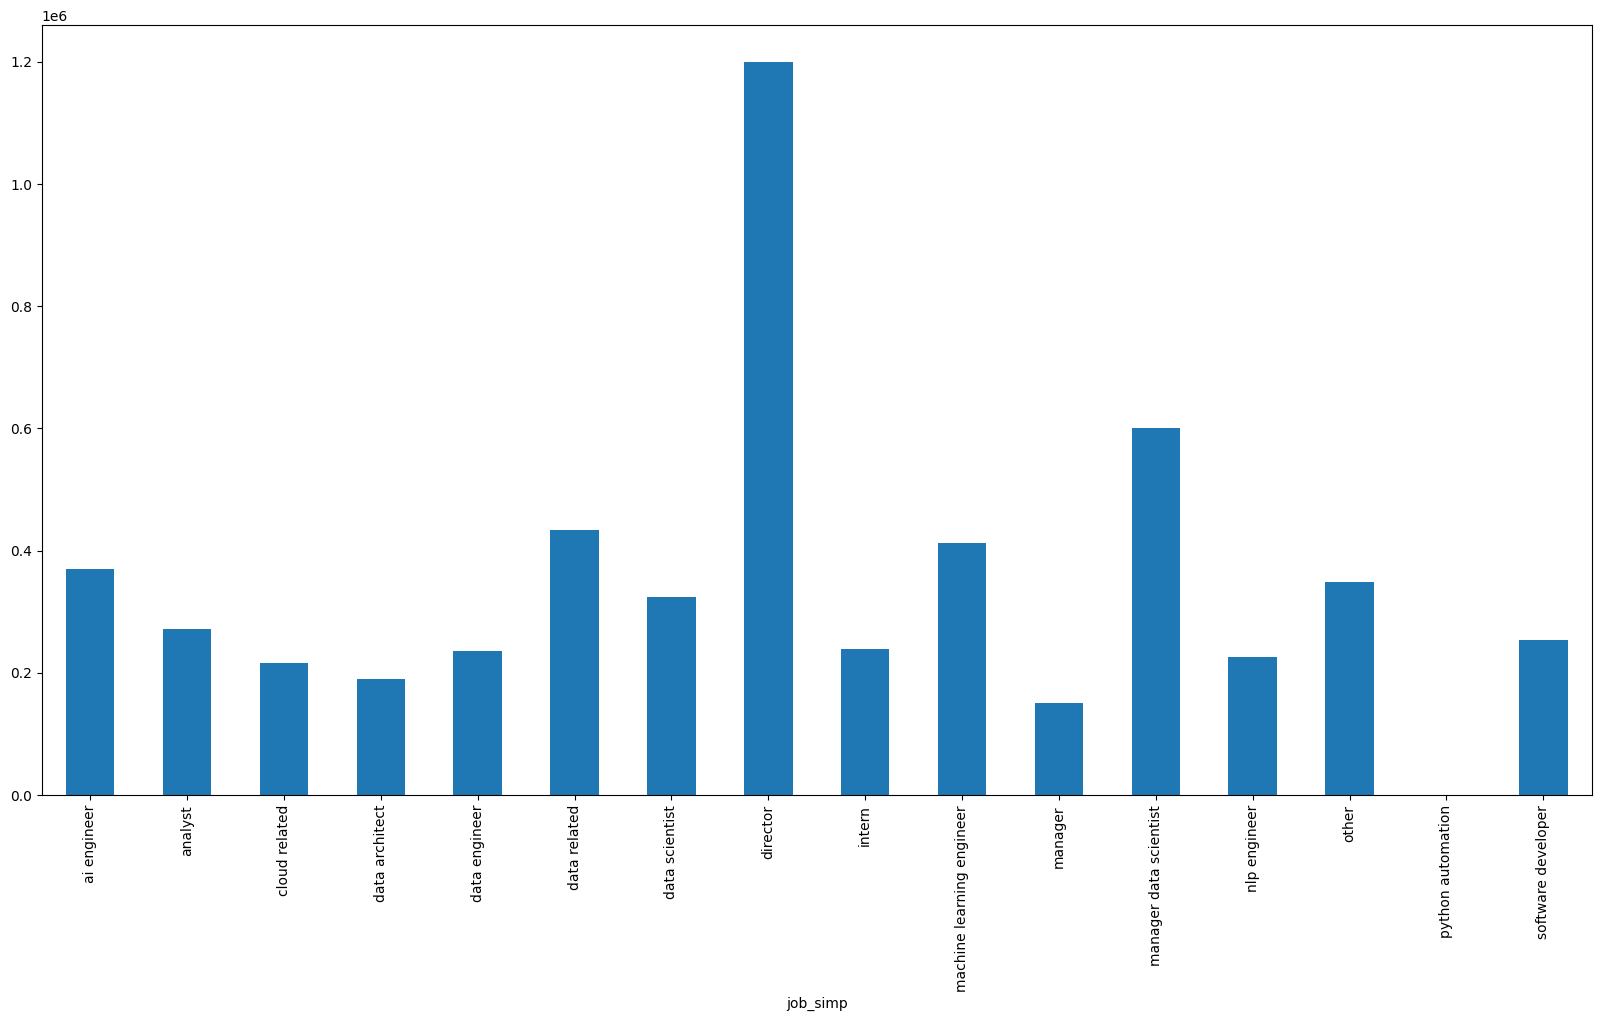

In [410]:
for col in df.select_dtypes(['object']).columns:
    if col != 'job_title' and col != 'job_description': # since they have huge no of categories
        plt.figure(figsize = (20,10))
        df.groupby(col)['avg_salary'].mean().plot(kind = 'bar')

In [411]:
catcols

Index(['company_name', 'location', 'job_title', 'job_description', 'Size',
       'Founded', 'Type', 'Industry', 'Sector', 'Revenue', 'skills',
       'job_simp'],
      dtype='object')

## `7) do higher rated companies pay well acc to our data`
#### No we could not find any such trend in our data from below plot

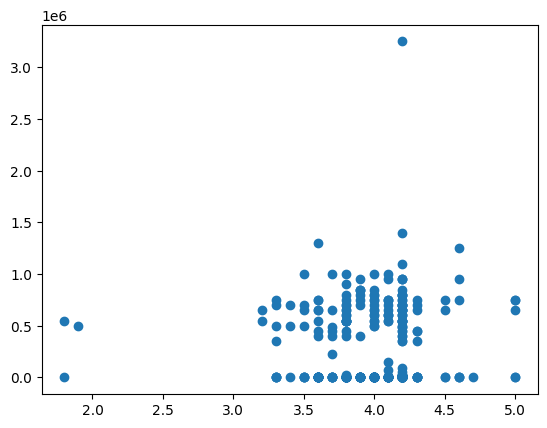

In [412]:
plt.scatter(df['rating'],df['avg_salary'])

In [413]:
## `to see outliers in avgsalary acc to catcols`
# for col in df.select_dtypes(['object']).columns:
#     plt.figure(figsize = (20,10))
#     sns.boxplot(x=col, y='avg_salary', data=df)
#     sns.violinplot(x=col, y='avg_salary', data=df)


## `8) Skills needed for different profiles`

In [414]:
df['skills'].value_counts()

skills
Data science                                                                         11
Microsoft Powerpoint, Statistics, Power BI, Microsoft Access, Azure                   9
CI/CD, Cloud infrastructure, Azure, Node.js, React                                    6
Microsoft Powerpoint, Supply chain, Spark, Alteryx, Analysis skills                   5
Oracle, XML, Spark, NoSQL, MongoDB                                                    5
                                                                                     ..
TensorFlow, Image processing, Azure, Software troubleshooting, Computer vision        1
TensorFlow, Statistics, Big data, Software deployment, Spark                          1
Machine learning, Distributed systems                                                 1
Image processing, Machine learning, Natural language processing, Data science, AI     1
Power BI, Microsoft Excel, Salesforce, Application development, SQL                   1
Name: count, Length: 199,

In [415]:
# since we have a nan value in the skills column for the test data part so we can use the train set to analyse profile wise skills 
df[df.skills.isna()]

company_name location       job_title  \
370   SmartHelio    Delhi  data scientist   

                                       job_description  rating  \
370  Join our team as an experienced data scientist...     4.7   

     employer_estimate  min_salary  max_salary  avg_salary               Size  \
370                  0          -1          -1        -1.0  1 to 50 Employees   

    Founded     Type Industry Sector                   Revenue skills  age  \
370      --  Unknown       --     --  Unknown / Non-Applicable    NaN  NaN   

     seniority        job_simp  
370        1.0  data scientist

In [416]:
# Filter once for training data
train_data = df[df['avg_salary'] != -1]

# Now split into features (xtrain) and target (ytrain) this was required for the modelling phase purpose but since we are still in eda phase,
# we can scale both features and target column together
xtrain = train_data.drop('avg_salary', axis=1)
ytrain = train_data['avg_salary']  # Selecting a single column doesn't need .loc

# For test data
xtest = df[df['avg_salary'] == -1].drop('avg_salary', axis=1)

In [417]:
xtrain.job_simp.nunique()

15

In [418]:
df.job_simp.nunique()

16

In [419]:
df.groupby(['job_simp'])['skills'].apply(lambda x : ', '.join(x.dropna())).reset_index()

job_simp  \
0                 ai engineer   
1                     analyst   
2               cloud related   
3              data architect   
4               data engineer   
5                data related   
6              data scientist   
7                    director   
8                      intern   
9   machine learning engineer   
10                    manager   
11     manager data scientist   
12               nlp engineer   
13                      other   
14          python automation   
15         software developer   

                                               skills  
0    Azure, Big data, Spark, R, Java,  Research, A...  
1    Business intelligence, Relational databases, ...  
2    Jira, CI/CD, Azure, Customer service, DevOps,...  
3    Azure, Cloud architecture, PCI, Kubernetes, B...  
4    Oracle, XML, Spark, NoSQL, MongoDB,  Microsof...  
5    Databases, SQL, Machine learning, Communicati...  
6    Web development, Machine learning, Data scien...  
7    Data modeling, Cloud architecture, Node.js, C...  
8    MATLAB, Rust, Go, C#, R,  Laboratory experien...  
9    Presentation skills, Machine learning, Deep l...  
10   SAP, SOX, Analysis skills, SAP S/4HANA, RMF, ...  
11   TensorFlow, Big data, SQL, Analysis skills, M...  
12   Software deployment, Information security, Ja...  
13   TensorFlow, Image processing, Azure, Kubernet...  
14       CI/CD, Azure, Test automation, Selenium, Git  
15   FTP, Azure, React, NFS, Web development,  Git...

In [420]:
# Group by simplified job title and aggregate all skills for each job_simp
skills_per_job = df.dropna(subset = 'skills').groupby('job_simp')['skills'].apply(lambda x: ', '.join(x)).reset_index()

# Split skills into individual skill tags for each job_simp
skills_per_job['skills'] = skills_per_job['skills'].apply(lambda x: list(set(x.split(', '))))

# Preview the result
skills_per_job.head()


job_simp                                             skills
0     ai engineer  [ Azure, Data science, Machine learning, Angul...
1         analyst  [Oracle,  Research, Tableau,  Statistics, Data...
2   cloud related  [DevOps, Customer service,  CI/CD, CI/CD, Java...
3  data architect  [Oracle,  Kubernetes, Design patterns, Azure, ...
4   data engineer  [Oracle, Azure,  Big data,  Statistics, Cassan...

In [421]:
#pd.pivot_table(data = df, index = 'job_simp', values = 'avg_salary') # did the same thing as df.groupby on jobsimp

In [422]:
# Pivot table initials 
# data: 'DataFrame',
#     values=None,
#     index=None,
#     columns=None,
#     aggfunc: 'AggFuncType' = 'mean',
#     fill_value=None,
#     margins: 'bool' = False,
#     dropna: 'bool' = True,
#     margins_name: 'str' = 'All',
#     observed: 'bool' = False,
#     sort: 'bool' = True,
# ) -> 'DataFrame'

In [423]:
df.dropna(subset = 'skills').groupby(['job_simp'])['avg_salary'].mean().reset_index()

job_simp    avg_salary
0                 ai engineer  3.699996e+05
1                     analyst  2.719315e+05
2               cloud related  2.166660e+05
3              data architect  1.889700e+05
4               data engineer  2.349995e+05
5                data related  4.333327e+05
6              data scientist  3.275083e+05
7                    director  1.200000e+06
8                      intern  2.392302e+05
9   machine learning engineer  4.115380e+05
10                    manager  1.512052e+05
11     manager data scientist  5.999997e+05
12               nlp engineer  2.261661e+05
13                      other  3.492850e+05
14          python automation -1.000000e+00
15         software developer  2.532686e+05

In [424]:
job_salary = df.dropna(subset = 'skills').groupby(['job_simp'])['avg_salary'].mean().reset_index()
job_salary.shape

(16, 2)

In [425]:
skills_per_job.shape

(16, 2)

In [426]:
skills_per_job.isna().sum()

job_simp    0
skills      0
dtype: int64

In [427]:
skills_per_job = skills_per_job.merge(job_salary, on = 'job_simp') # join performed

In [428]:
skills_per_job.head()

job_simp                                             skills  \
0     ai engineer  [ Azure, Data science, Machine learning, Angul...   
1         analyst  [Oracle,  Research, Tableau,  Statistics, Data...   
2   cloud related  [DevOps, Customer service,  CI/CD, CI/CD, Java...   
3  data architect  [Oracle,  Kubernetes, Design patterns, Azure, ...   
4   data engineer  [Oracle, Azure,  Big data,  Statistics, Cassan...   

      avg_salary  
0  369999.600000  
1  271931.530864  
2  216666.000000  
3  188970.000000  
4  234999.464286

### `visualizations on various skills for different job titles`

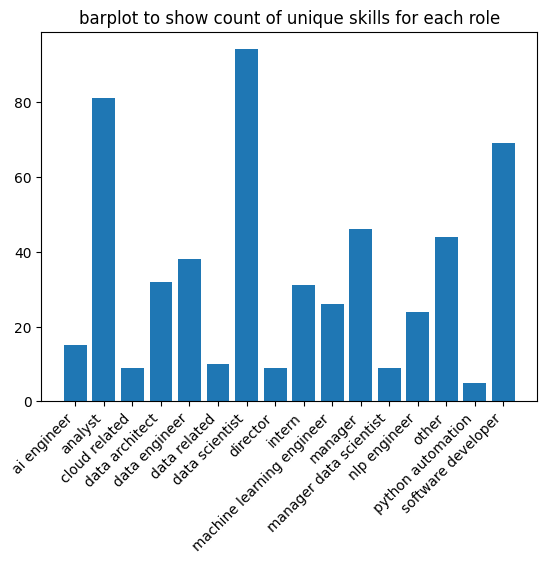

In [429]:
plt.bar(skills_per_job['job_simp'], skills_per_job['skills'].apply(lambda x : len(x)))
plt.title("barplot to show count of unique skills for each role")
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [430]:
skills_per_job.skills.apply(len).sum()

np.int64(542)

In [431]:
len(skills_per_job.skills.sum())

542

In [432]:
len(set(skills_per_job.skills.sum()))

229

In [433]:
skills_per_job['skills'][0]

[' Azure',
 'Data science',
 'Machine learning',
 'Angular',
 'Java',
 'React',
 'Big data',
 'Software deployment',
 ' Research',
 'Django',
 ' Node.js',
 'R',
 'Natural language processing',
 'Analysis skills',
 'Spark']

In [434]:
for i in range(skills_per_job.shape[0]):
    print(f"{skills_per_job['job_simp'][i]} - Skills ")
    for skill in skills_per_job['skills'][i]:
        print(f"\t      {skill.strip()}")

ai engineer - Skills 
	      Azure
	      Data science
	      Machine learning
	      Angular
	      Java
	      React
	      Big data
	      Software deployment
	      Research
	      Django
	      Node.js
	      R
	      Natural language processing
	      Analysis skills
	      Spark
analyst - Skills 
	      Oracle
	      Research
	      Tableau
	      Statistics
	      Data mining
	      Databases
	      Statistics
	      Computer science
	      Data entry
	      Microsoft Excel
	      Communication skills
	      Google AdWords
	      Product management
	      Power BI
	      Microsoft Outlook
	      Data management
	      Power BI
	      Business intelligence
	      Data modeling
	      Azure
	      Analytics
	      Computer science
	      Presentation skills
	      Salesforce
	      Data science
	      Data analysis skills
	      Microsoft Access
	      Application development
	      AWS
	      Microsoft Powerpoint
	      Market research
	      NoSQL
	      Asset management
	     

In [435]:
#skills_per_job.to_csv("skills_per_job_salary.csv", index = False)

In [436]:
skills_per_job.sort_values(by = 'avg_salary')

job_simp  \
14          python automation   
10                    manager   
3              data architect   
2               cloud related   
12               nlp engineer   
4               data engineer   
8                      intern   
15         software developer   
1                     analyst   
6              data scientist   
13                      other   
0                 ai engineer   
9   machine learning engineer   
5                data related   
11     manager data scientist   
7                    director   

                                               skills    avg_salary  
14    [ CI/CD, Azure, Test automation, Git, Selenium] -1.000000e+00  
10  [Vendor management, Lean, React,  Cloud infras...  1.512052e+05  
3   [Oracle,  Kubernetes, Design patterns, Azure, ...  1.889700e+05  
2   [DevOps, Customer service,  CI/CD, CI/CD, Java...  2.166660e+05  
12  [React, Oracle, Azure,  Computer science, Sale...  2.261661e+05  
4   [Oracle, Azure,  Big data,  Statistics, Cassan...  2.349995e+05  
8   [Tableau,  Computer science,  Project manageme...  2.392302e+05  
15  [Clinical research,  TensorFlow, React, Oracle...  2.532686e+05  
1   [Oracle,  Research, Tableau,  Statistics, Data...  2.719315e+05  
6   [Oracle, Tableau,  Statistics, Cloud computing...  3.275083e+05  
13  [ SSO,  TensorFlow, React,  Data structures, S...  3.492850e+05  
0   [ Azure, Data science, Machine learning, Angul...  3.699996e+05  
9   [ TensorFlow, Search engines, Azure, Data scie...  4.115380e+05  
5   [Machine learning, Communication skills,  Cust...  4.333327e+05  
11  [ TensorFlow, Machine learning, Big data, Kube...  5.999997e+05  
7   [ CI/CD, React, CSS, Oracle,  Data modeling, A...  1.200000e+06

### below two cells explain how the above code works 
- on Group by simplified job title and aggregate all skills for each job_simp
- then taking only the unique skills in for each simplified job title

In [437]:
pd.DataFrame({'skills':[' Azure, Big data, Spark', 'R, Java,  Research, Analysis skills', 'ML, NLP, Data science'],'job_simp':['ai engineer', 'Azure developer', 'ai engineer']})

skills         job_simp
0               Azure, Big data, Spark      ai engineer
1  R, Java,  Research, Analysis skills  Azure developer
2                ML, NLP, Data science      ai engineer

In [438]:
pd.DataFrame({'skills':[' Azure, Big data, Spark', 'R, Java,  Research, Analysis skills', 'ML, NLP, Data science'],'job_simp':['ai engineer', 'Azure developer', 'ai engineer']}).groupby(['job_simp'])['skills'].apply(lambda x : ', '.join(x)).reset_index()

job_simp                                          skills
0  Azure developer             R, Java,  Research, Analysis skills
1      ai engineer   Azure, Big data, Spark, ML, NLP, Data science

In [439]:
print(df[['skills', 'job_title']].isnull().sum())

skills       1
job_title    0
dtype: int64


In [440]:
df.skills

0            SAP, SOX, Analysis skills, SAP S/4HANA, RMF
1       Business intelligence, Relational databases, ...
2        Web development, Machine learning, Data science
3       TensorFlow, Big data, SQL, Analysis skills, M...
4                     Oracle, XML, Spark, NoSQL, MongoDB
                             ...                        
369                Machine learning, Distributed systems
370                                                  NaN
371     Image processing, Machine learning, Natural l...
372                                         Data science
373     Power BI, Microsoft Excel, Salesforce, Applic...
Name: skills, Length: 374, dtype: object

## `WordCloud for skill tags`

In [441]:
df.isna().sum()

company_name           0
location               0
job_title              0
job_description        0
rating                53
employer_estimate      0
min_salary             0
max_salary             0
avg_salary             0
Size                  51
Founded               51
Type                  51
Industry              51
Sector                51
Revenue               51
skills                 1
age                  106
seniority              0
job_simp               0
dtype: int64

In [442]:
#### we can collect all the skill tags from all simplified job titles together to make a word cloud
lst = []
for i in df.skills:
    if(pd.isna(i)):
        continue
    for j in i.split(','):
        lst.append(j.strip())

In [443]:
freq = [lst.count(x) for x in lst]

In [444]:
#list(map(lambda x : list(s).count(x) , s)) # correct usage but since applied on elements of a map gives frequency as 1

In [445]:
len(freq)

1728

In [446]:
len(lst) # we have got 183 skill tags

1728

In [447]:
skill_tags_freq = dict(zip(lst,freq))

In [448]:
skill_tags_freq

{'SAP': 10,
 'SOX': 1,
 'Analysis skills': 51,
 'SAP S/4HANA': 2,
 'RMF': 1,
 'Business intelligence': 6,
 'Relational databases': 5,
 'Tableau': 25,
 'Databases': 13,
 'SQL': 60,
 'Web development': 4,
 'Machine learning': 64,
 'Data science': 54,
 'TensorFlow': 25,
 'Big data': 45,
 'Oracle': 25,
 'XML': 6,
 'Spark': 42,
 'NoSQL': 17,
 'MongoDB': 6,
 'Image processing': 13,
 'Azure': 121,
 'Kubernetes': 24,
 'Computer vision': 6,
 'FTP': 2,
 'React': 24,
 'NFS': 1,
 'Data visualization': 4,
 'Communication skills': 26,
 'AI': 24,
 'Python': 17,
 'Statistics': 26,
 'SAS': 5,
 'R': 47,
 'Google Cloud Platform': 9,
 'Java': 16,
 'MATLAB': 7,
 'Rust': 6,
 'Go': 10,
 'C#': 7,
 'Presentation skills': 7,
 'Deep learning': 8,
 'Natural language processing': 16,
 'Research': 11,
 'Microsoft Excel': 27,
 'Data mining': 21,
 'Power BI': 56,
 'Data structures': 17,
 'CSS': 14,
 'Statistical analysis': 1,
 'Database management': 3,
 'Cloud architecture': 15,
 'PCI': 5,
 'Microsoft Powerpoint': 40

In [449]:
# forming a word cloud
#!pip install wordcloud  - this required microsoft visual studio c++ build tools 

In [450]:
import wordcloud

In [451]:
' '.join(lst)

'SAP SOX Analysis skills SAP S/4HANA RMF Business intelligence Relational databases Tableau Databases SQL Web development Machine learning Data science TensorFlow Big data SQL Analysis skills Machine learning Oracle XML Spark NoSQL MongoDB TensorFlow Image processing Azure Kubernetes Computer vision FTP Azure React NFS Web development SQL Analysis skills Data science Data visualization Communication skills SQL Data science AI Python Statistics Oracle SAS R Tableau TensorFlow Image processing Azure Computer vision Google Cloud Platform Azure Big data Spark R Java MATLAB Rust Go C# R Image processing Azure Big data R Google Cloud Platform Presentation skills Machine learning Deep learning Natural language processing Data science Research Analysis skills Data science Communication skills Statistics Microsoft Excel Data mining R SQL Power BI Data structures SQL Machine learning Data science CSS SQL Statistical analysis Database management Machine learning Azure Big data Spark Google Cloud 

In [478]:
lst

['SAP',
 'SOX',
 'Analysis skills',
 'SAP S/4HANA',
 'RMF',
 'Business intelligence',
 'Relational databases',
 'Tableau',
 'Databases',
 'SQL',
 'Web development',
 'Machine learning',
 'Data science',
 'TensorFlow',
 'Big data',
 'SQL',
 'Analysis skills',
 'Machine learning',
 'Oracle',
 'XML',
 'Spark',
 'NoSQL',
 'MongoDB',
 'TensorFlow',
 'Image processing',
 'Azure',
 'Kubernetes',
 'Computer vision',
 'FTP',
 'Azure',
 'React',
 'NFS',
 'Web development',
 'SQL',
 'Analysis skills',
 'Data science',
 'Data visualization',
 'Communication skills',
 'SQL',
 'Data science',
 'AI',
 'Python',
 'Statistics',
 'Oracle',
 'SAS',
 'R',
 'Tableau',
 'TensorFlow',
 'Image processing',
 'Azure',
 'Computer vision',
 'Google Cloud Platform',
 'Azure',
 'Big data',
 'Spark',
 'R',
 'Java',
 'MATLAB',
 'Rust',
 'Go',
 'C#',
 'R',
 'Image processing',
 'Azure',
 'Big data',
 'R',
 'Google Cloud Platform',
 'Presentation skills',
 'Machine learning',
 'Deep learning',
 'Natural language proces

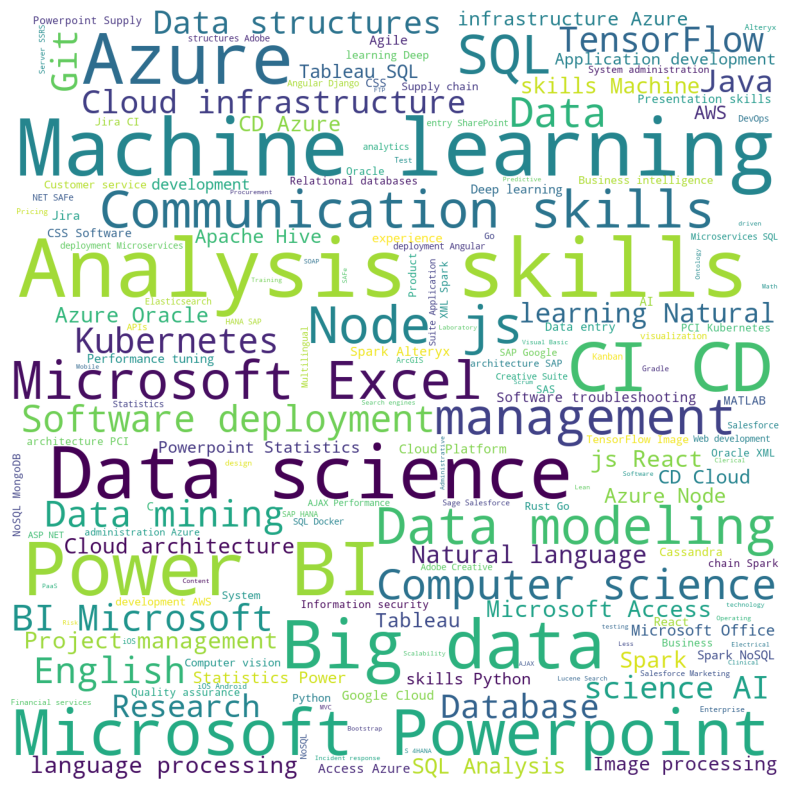

In [452]:
plt.figure(figsize = (12, 10), facecolor = None)
plt.imshow(wordcloud.WordCloud(width = 1200, height = 1200, background_color="white",min_font_size =10).generate(' '.join(lst)))
plt.axis('off')
plt.show()

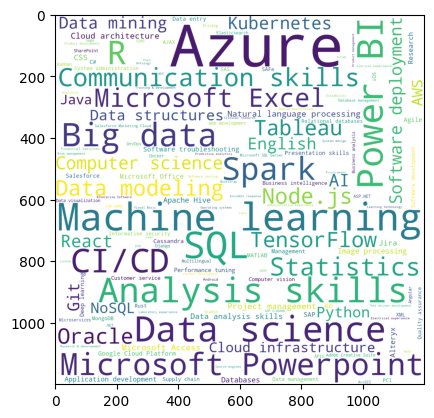

In [453]:
#or we could use this code as well
from wordcloud import WordCloud
img = WordCloud(width = 1200, height = 1200, background_color="white",min_font_size =10).generate_from_frequencies(skill_tags_freq)
plt.imshow(img)

### Wordcloud for job descriptions

In [467]:
df.job_description = df.job_description.apply(remove_punctuations)

In [474]:
df.job_description = df.job_description.apply(str.lower)

In [475]:
df.job_description[0].split()

['the',
 'senior',
 'manager’s',
 'role',
 'will',
 'ensure',
 'that',
 'the',
 'sap',
 'security',
 'strategy',
 'and',
 'risk',
 'and',
 'compliance',
 'management',
 'frameworks',
 'are',
 'always',
 'uptodate',
 'new',
 'threats',
 'are……',
 'skills',
 'sap',
 'sox',
 'analysis',
 'skills',
 'sap',
 's4hana',
 'rmf']

In [477]:
st = ''
for i in df.job_description:
    st += i

st

'the senior manager’s role will ensure that the sap security strategy and risk and compliance management frameworks are always uptodate new threats are……\r\nskills sap sox analysis skills sap s4hana rmfwe are responsible for assuring that data impacts are evaluate understood and communicated across all teams so that business continuity is maintained…\r\nskills business intelligence relational databases tableau databases sqlyou will be assigned with module projects and tasks during the internship and on the basis of performance and availability of vacancies you will be hired…\r\nskills web development machine learning data scienceas an associate manager you will play a critical role in driving the success of our data science projects leading a team of data scientists and delivering……\r\nskills tensorflow big data sql analysis skills machine learningrequire financial services industry experience this is a high visibility fastpaced key initiative will integrate data across internal and ex

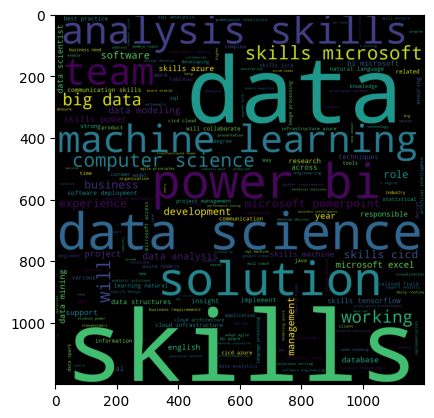

In [479]:
plt.imshow(wordcloud.WordCloud(width = 1200, height = 1200, min_font_size = 10).generate(st))

In [459]:
#df.to_csv('final_data.csv', index = False)